En este archivo Phyton vamos a realizar la carga y tratamiento de los archivos proporcionados por la empresa Pontia World.

# 💻CARGA, LIMPIEZA Y VISUALIZACION JSON INDIVIDUALES💻

#📚Importación de librerias Phyton

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from os import sep
import json
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 🕵🏻 Exploración de **emocion.json**

In [ ]:
ruta_json = '/content/drive/MyDrive/PROYECTO JUPITER EMOCIONES/emocion.json'

# Leer el JSON en un DataFrame
df = pd.read_json(ruta_json)

# Mostrar el DataFrame para verificar
print(df)
df.shape

                 Training_10118481.jpg  Training_10120469.jpg  \
t_id             Training_10118481.jpg  Training_10120469.jpg   
emocion                          angry                  angry   
tiempo_recogida                    291                    425   

                 Training_10131352.jpg  Training_10161559.jpg  \
t_id             Training_10131352.jpg  Training_10161559.jpg   
emocion                          angry                  angry   
tiempo_recogida                    499                    715   

                 Training_1021836.jpg  Training_10269675.jpg  \
t_id             Training_1021836.jpg  Training_10269675.jpg   
emocion                         angry                  angry   
tiempo_recogida                   301                    415   

                 Training_10278738.jpg  Training_10290703.jpg  \
t_id             Training_10278738.jpg  Training_10290703.jpg   
emocion                          angry                  angry   
tiempo_recogida           

(3, 35885)

**Transformar el DataFrame**

Objetivo: Convertir las 35,885 columnas en filas, con columnas separadas para t_id, emocion, y tiempo_recogida.

Acción: Transponer el DataFrame con df.T para que cada fotografía sea una fila, y renombrar las columnas.

In [ ]:
# Transponer para que columnas sean filas
df_transformado = df.T


# Renombrar columnas (opcional, para claridad)
df_transformado.columns = ['t_id', 'emocion', 'tiempo_recogida']

#devolvemos el index

df_transformado = df_transformado.reset_index(drop=True)

# Mostrar el resultado
df_transformado.head()

t_id emocion tiempo_recogida
0  Training_10118481.jpg   angry             291
1  Training_10120469.jpg   angry             425
2  Training_10131352.jpg   angry             499
3  Training_10161559.jpg   angry             715
4   Training_1021836.jpg   angry             301

**Exploración inicial de los datos**

Objetivo:
1.Analizar la distribución de emocion y tiempo_recogida para detectar posibles errores (ej. nulos, valores inválidos).
2.Traducir las emociones a castellado, ya que nuestra empresa es Española

1.   Analizar la distribución de emocion y tiempo_recogida para detectar posibles errores (ej. nulos, valores inválidos).
2.   Traducir las emociones a castellado, ya que nuestra empresa es Española
3.   Entender y trabajar la columnda **tiempo_recogida** para sacar conclusiones y entender coherencia de los datos



In [ ]:
# Exploración inicial

# Exploración

print("Frecuencia de emociones:")
print(df_transformado["emocion"].value_counts())

print("\nEstadísticas de tiempo_recogida:")
print(df_transformado["tiempo_recogida"].describe())

# Diccionario de traducción
traduccion_emociones = {
    'happy': 'feliz',
    'neutral': 'neutral',
    'sad': 'triste',
    'fear': 'miedo',
    'angry': 'enojado',
    'surprise': 'sorpresa',
    'disgust': 'asco'
}
# Cambio de idioma de las emociones
df_transformado['emocion'] = df_transformado['emocion'].replace(traduccion_emociones)
df_transformado.shape



Frecuencia de emociones:
emocion
happy       8901
neutral     6138
sad         6019
fear        5075
angry       4905
surprise    3953
disgust      543
Name: count, dtype: int64

Estadísticas de tiempo_recogida:
count     35885
unique      718
top         150
freq         68
Name: tiempo_recogida, dtype: int64


(35885, 3)

In [ ]:
# Convertir a formato legible
fecha_base = datetime(2022, 9, 1, 7, 0)
df_transformado['fecha_hora'] = df_transformado['tiempo_recogida'].apply(lambda x: fecha_base + timedelta(hours=int(x)))
df_transformado.head()


t_id  emocion tiempo_recogida          fecha_hora
0  Training_10118481.jpg  enojado             291 2022-09-13 10:00:00
1  Training_10120469.jpg  enojado             425 2022-09-19 00:00:00
2  Training_10131352.jpg  enojado             499 2022-09-22 02:00:00
3  Training_10161559.jpg  enojado             715 2022-10-01 02:00:00
4   Training_1021836.jpg  enojado             301 2022-09-13 20:00:00

## 🕵🏻Pipeline de limpieza y visualizacion individual de emociones.json

In [ ]:
max_tiempo_recogida = df_transformado['tiempo_recogida'].max()

print("=== Valor máximo de tiempo_recogida ===")
print("Máximo:", max_tiempo_recogida)

=== Valor máximo de tiempo_recogida ===
Máximo: 719


In [ ]:
#vamos a ver los valores unicos de tiempos de recogida ordenados de menor a mayor
valores_unicos = np.sort(df_transformado['tiempo_recogida'].unique())

print("=== Valores únicos de tiempo_recogida (ordenados de menor a mayor) ===")
print(valores_unicos)
print("\nNúmero de valores únicos:", len(valores_unicos))

=== Valores únicos de tiempo_recogida (ordenados de menor a mayor) ===
[2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76
 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 25

In [ ]:
#Calculamos las horas faltantes
# Definir la fecha base
fecha_base = pd.Timestamp("2022-09-01 07:00:00")

# Calcular la fecha y hora para tiempo_recogida = 719
fecha_hora = fecha_base + pd.to_timedelta(719, unit="h")

print("=== Representación de tiempo_recogida = 719 en horas reales ===")
print("Fecha y hora:", fecha_hora)

# Horas faltantes en formato legible
horas_faltantes = set(range(717)) - set(df_transformado["tiempo_recogida"])
fechas_faltantes = [fecha_base + timedelta(hours=h) for h in horas_faltantes]
print("Horas faltantes en formato legible:")
for fecha in sorted(fechas_faltantes):
    print(fecha)

=== Representación de tiempo_recogida = 719 en horas reales ===
Fecha y hora: 2022-10-01 06:00:00
Horas faltantes en formato legible:
2022-09-01 07:00:00
2022-09-01 08:00:00


In [ ]:
# Verificar duplicados en t_id (debería ser único)
duplicados_t_id = df_transformado[df_transformado['t_id'].duplicated(keep=False)]
count_duplicados_t_id = len(duplicados_t_id)

# Verificar duplicados en todas las columnas
duplicados_completos = df_transformado[df_transformado.duplicated(keep=False)]
count_duplicados_completos = len(duplicados_completos)

# Mostrar resultados
print("=== Análisis de duplicados en df_transformado ===")
print(f"Número de filas con t_id duplicado: {count_duplicados_t_id}")
if count_duplicados_t_id > 0:
    print("\nFilas con t_id duplicado (primeras 5 si existen):")
    print(duplicados_t_id[['t_id', 'emocion', 'tiempo_recogida', 'Fecha y hora foto']].head())

print(f"\nNúmero de filas completamente duplicadas (todas las columnas): {count_duplicados_completos}")
if count_duplicados_completos > 0:
    print("\nFilas completamente duplicadas (primeras 5 si existen):")
    print(duplicados_completos[['t_id', 'emocion', 'tiempo_recogida', 'Fecha y hora foto']].head())

=== Análisis de duplicados en df_transformado ===
Número de filas con t_id duplicado: 0

Número de filas completamente duplicadas (todas las columnas): 0


In [ ]:
# Contar nulos por columna
nulos_por_columna = df_transformado.isnull().sum()

# Mostrar resultados
print("=== Análisis de valores nulos en df_transformado ===")
print("Nulos por columna:")
print(nulos_por_columna)
print("\nTotal de filas con al menos un nulo:", df_transformado.isnull().any(axis=1).sum())

# Mostrar ejemplos de filas con nulos (si existen)
if nulos_por_columna.sum() > 0:
    print("\nPrimeras 5 filas con al menos un nulo (si existen):")
    print(df_transformado[df_transformado.isnull().any(axis=1)][['t_id', 'emocion', 'tiempo_recogida']].head())

=== Análisis de valores nulos en df_transformado ===
Nulos por columna:
t_id                 0
emocion            351
tiempo_recogida      0
fecha_hora           0
dtype: int64

Total de filas con al menos un nulo: 351

Primeras 5 filas con al menos un nulo (si existen):
                      t_id emocion tiempo_recogida
13   Training_10345473.jpg    None             230
62   Training_11769417.jpg    None             647
298  Training_17201713.jpg    None             143
458  Training_20501161.jpg    None             703
525  Training_21945057.jpg    None              36


Podemos observar que hay algunas fotos que no tienen asociada una emocion, que son lo que llamamos nulos.Antes de eliminar los nulos decidimos hacer un conteo y explicar de forma gráfica por qué consideramos que los datos nulos dentro del dataset son irrelevantes y no podrían causar un cambio significativo para el análisis o para la toma de deciciones

In [ ]:
# Calcular el número de filas con y sin nulos en la columna emocion

nulos = df_transformado['emocion'].isnull().sum()
no_nulos = len(df_transformado) - nulos

# Crear DataFrame para el gráfico
df_nulos = pd.DataFrame({
    'Estado': ['Datos Válidos', 'Datos Nulos'],
    'Cantidad': [no_nulos, nulos]
})

# Calcular porcentajes para el texto
df_nulos['Porcentaje'] = (df_nulos['Cantidad'] / len(df_transformado) * 100).round(2)

# Crear gráfico de barras
fig = px.bar(df_nulos, x='Estado', y='Cantidad',
             title='Comparación de Datos Válidos vs. Datos Nulos en la Columna Emoción',
             labels={'Cantidad': 'Número de Filas', 'Estado': 'Estado de los Datos'},
             color='Estado',
             text='Porcentaje',
             color_discrete_map={'Datos Válidos': '#00CC96', 'Datos Nulos': '#EF553B'})

# Personalizar el gráfico
fig.update_traces(texttemplate='%{text:.2f}%', textposition='auto')
fig.update_layout(yaxis_title='Número de Filas',
                  xaxis_title='Estado de los Datos',
                  showlegend=True,
                  bargap=0.3)

# Mostrar el gráfico
fig.show()

In [ ]:
# Eliminar filas con nulos en emocion
df_transformado = df_transformado.dropna(subset=['emocion'])

# Verificar resultados
print("\n=== Después de eliminar nulos ===")
print("Filas totales:", len(df_transformado))
print("Nulos en emocion:", df_transformado['emocion'].isnull().sum())
print("\nPrimeras 5 filas del DataFrame limpio:")
print(df_transformado[['t_id', 'emocion', 'tiempo_recogida']].head())
df_transformado.head(40000)


=== Después de eliminar nulos ===
Filas totales: 35534
Nulos en emocion: 0

Primeras 5 filas del DataFrame limpio:
                    t_id  emocion tiempo_recogida
0  Training_10118481.jpg  enojado             291
1  Training_10120469.jpg  enojado             425
2  Training_10131352.jpg  enojado             499
3  Training_10161559.jpg  enojado             715
4   Training_1021836.jpg  enojado             301


t_id   emocion tiempo_recogida          fecha_hora
0        Training_10118481.jpg   enojado             291 2022-09-13 10:00:00
1        Training_10120469.jpg   enojado             425 2022-09-19 00:00:00
2        Training_10131352.jpg   enojado             499 2022-09-22 02:00:00
3        Training_10161559.jpg   enojado             715 2022-10-01 02:00:00
4         Training_1021836.jpg   enojado             301 2022-09-13 20:00:00
...                        ...       ...             ...                 ...
35880  PublicTest_98089595.jpg  sorpresa             469 2022-09-20 20:00:00
35881  PublicTest_98567249.jpg  sorpresa             299 2022-09-13 18:00:00
35882  PublicTest_98972870.jpg  sorpresa             255 2022-09-11 22:00:00
35883  PublicTest_99242645.jpg  sorpresa             573 2022-09-25 04:00:00
35884  PublicTest_99446963.jpg  sorpresa             466 2022-09-20 17:00:00

[35534 rows x 4 columns]

In [ ]:
# Filtrar datos para mostrar los datos hasta la fecha máxima de octubre (fecha_hora <= 2022-10-01)
df_filtrado = df_transformado[df_transformado['fecha_hora'] <= '2022-10-01 06:00:00']

# Verifica el filtro
print("=== Verificación del filtro ===")
print("Filas en df_filtrado:", len(df_filtrado))
print("Fecha mínima:", df_filtrado['fecha_hora'].min())
print("Fecha máxima:", df_filtrado['fecha_hora'].max())
print("Filas en octubre:", len(df_filtrado[df_filtrado['fecha_hora'] >= '2022-10-01 06:00:00']))

# Heatmap de
fig2 = px.density_heatmap(df_filtrado, x="fecha_hora", y="emocion",
                          marginal_x="histogram", marginal_y="histogram",
                          title="Distribución de emociones en el Parque (Septiembre 2022)",
                          range_x=["2022-09-01 00:00:00", "2022-10-01 06:00:00"],
                          nbinsx=100)

# Personalización
fig2.update_layout(yaxis_title='Emociones',
                   xaxis_title='Fecha y Hora',
                   showlegend=False,
                   bargap=0.2)

# Mostrar el heatmap
fig2.show()

=== Verificación del filtro ===
Filas en df_filtrado: 35534
Fecha mínima: 2022-09-01 09:00:00
Fecha máxima: 2022-10-01 06:00:00
Filas en octubre: 53


In [ ]:
# Calcular los porcentajes de cada emoción
emociones_counts = df_transformado['emocion'].value_counts(normalize=True) * 100
df_porcentajes = emociones_counts.reset_index()
df_porcentajes.columns = ['Emoción', 'Porcentaje']

# Crear gráfico de barras
fig = px.bar(df_porcentajes, x='Emoción', y='Porcentaje',
             title='Media de Porcentajes de Emociones en el Parque',
             labels={'Porcentaje': 'Porcentaje (%)', 'Emoción': 'Emoción'},
             color='Emoción',
             text='Porcentaje')

# Personalizar el gráfico
fig.update_traces(texttemplate='%{text:.1f}%', textposition='auto')
fig.update_layout(yaxis_title='Porcentaje (%)',
                  xaxis_title='Emoción',
                  showlegend=False,
                  bargap=0.2)

# Mostrar el gráfico
fig.show()

**just for fun- vamos a hacer el mismo grafico usando un mapa de colores de la pelicula INSIDE OUT**

In [ ]:
import plotly.express as px

# Calcular los porcentajes de cada emoción
emociones_counts = df_transformado['emocion'].value_counts(normalize=True) * 100
df_porcentajes = emociones_counts.reset_index()
df_porcentajes.columns = ['Emoción', 'Porcentaje']

# Definir el mapa de colores
colores_emociones = {
    'feliz': 'yellow',
    'triste': 'blue',
    'miedo': 'violet',
    'enojado': 'red',
    'sorpresa': 'orange',
    'asco': 'green',
    'neutral': 'gray'
}

# Crear gráfico de barras con colores personalizados
fig = px.bar(df_porcentajes, x='Emoción', y='Porcentaje',
             title='Media de Porcentajes de Emociones en el Parque',
             labels={'Porcentaje': 'Porcentaje (%)', 'Emoción': 'Emoción'},
             color='Emoción',
             color_discrete_map=colores_emociones,
             text='Porcentaje')

# Personalizar el gráfico
fig.update_traces(texttemplate='%{text:.1f}%', textposition='auto')
fig.update_layout(yaxis_title='Porcentaje (%)',
                  xaxis_title='Emoción',
                  showlegend=False,
                  bargap=0.2)

# Mostrar el gráfico
fig.show()

In [ ]:
# Después de conocer los porcentajes de las emociones decidimos agrupar las emociones en 2 grupos: emociones positivas y emociones negativas;
# de esta forma podemos tener una visión general de las emociones que han sentido los usuarios durante su visita en el parque

# Definir categorías de emociones
positivas = ['feliz', 'sorpresa']
negativas = ['triste', 'miedo', 'enojado', 'asco']
neutral = ['neutral']

# Calcular porcentajes de cada emoción
emociones_counts = df_transformado['emocion'].value_counts(normalize=True) * 100
df_porcentajes = emociones_counts.reset_index()
df_porcentajes.columns = ['Emoción', 'Porcentaje']

# Agrupar por categorías
positivas_porcentaje = df_porcentajes[df_porcentajes['Emoción'].isin(positivas)]['Porcentaje'].sum()
negativas_porcentaje = df_porcentajes[df_porcentajes['Emoción'].isin(negativas)]['Porcentaje'].sum()
neutral_porcentaje = df_porcentajes[df_porcentajes['Emoción'].isin(neutral)]['Porcentaje'].sum()

# Crear DataFrame para el gráfico
df_categorias = pd.DataFrame({
    'Categoría': ['Positivas', 'Negativas', 'Neutral'],
    'Porcentaje': [positivas_porcentaje, negativas_porcentaje, neutral_porcentaje]
})

# Crear gráfico de barras
fig = px.bar(df_categorias, x='Categoría', y='Porcentaje',
             title='Porcentaje de Emociones Positivas, Negativas y Neutrales en el Parque',
             labels={'Porcentaje': 'Porcentaje (%)', 'Categoría': 'Categoría de Emoción'},
             color='Categoría',
             text='Porcentaje',
             color_discrete_map={'Positivas': '#00CC96', 'Negativas': '#EF553B', 'Neutral': '#636EFA'})

# Personalizar el gráfico
fig.update_traces(texttemplate='%{text:.1f}%', textposition='auto')
fig.update_layout(yaxis_title='Porcentaje (%)',
                  xaxis_title='Categoría de Emoción',
                  showlegend=True,
                  bargap=0.3)

# Mostrar el gráfico
fig.show()

#👀 Exploración de valoraciones.json

In [ ]:
# Importo el json "valoraciones" localizado en la carpeta compartida de PROYECTO JÚPITER

import json

ruta_json = '/content/drive/MyDrive/PROYECTO JUPITER EMOCIONES/Colabs/Iñigo/valoraciones.json'

# Abrir y cargar el archivo JSON
with open(ruta_json, 'r') as archivo:
    datos = json.load(archivo)

# Mostrar contenido del JSON - vemos que la clase es un diccionario
print(datos)
print(type(datos))

{'Training_10118481.jpg': 2, 'Training_10120469.jpg': 6, 'Training_10131352.jpg': 0, 'Training_10161559.jpg': 4, 'Training_1021836.jpg': 6, 'Training_10269675.jpg': 3, 'Training_10278738.jpg': 6, 'Training_10290703.jpg': 0, 'Training_10295477.jpg': 1, 'Training_10315441.jpg': 4, 'Training_10316849.jpg': 0, 'Training_10333072.jpg': 7, 'Training_10334355.jpg': 2, 'Training_10345473.jpg': 1, 'Training_10422050.jpg': 5, 'Training_10485618.jpg': 9, 'Training_10503476.jpg': 1, 'Training_10524198.jpg': 3, 'Training_10539399.jpg': 2, 'Training_10592361.jpg': 3, 'Training_10595751.jpg': 8, 'Training_10608067.jpg': 0, 'Training_10740356.jpg': 5, 'Training_10851653.jpg': 3, 'Training_10857340.jpg': 2, 'Training_10882484.jpg': 5, 'Training_10899258.jpg': 2, 'Training_10922970.jpg': 3, 'Training_10967257.jpg': 5, 'Training_11023881.jpg': 1, 'Training_11036720.jpg': 6, 'Training_11102431.jpg': 0, 'Training_11175213.jpg': 10, 'Training_11185740.jpg': 1, 'Training_1119091.jpg': 8, 'Training_11206889.j

In [ ]:
datos_valoraciones = [] #creamos una lista vacia para almacenar los datos

for archivo, valoracion in datos.items(): #queremos que en el bucle for para cada archivo nos guarde el diccionario en la variable valoracion
    datos_valoraciones.append({
        't_id': archivo,
        'valoracion': valoracion
    })

# Verificar resultado
print(datos_valoraciones[:5])  # Muestra las primeras 5 entradas

df_valoraciones = pd.DataFrame(datos_valoraciones)

print(df_valoraciones.shape)
print(df_valoraciones.describe())
df_valoraciones.columns
df_valoraciones.head()

[{'t_id': 'Training_10118481.jpg', 'valoracion': 2}, {'t_id': 'Training_10120469.jpg', 'valoracion': 6}, {'t_id': 'Training_10131352.jpg', 'valoracion': 0}, {'t_id': 'Training_10161559.jpg', 'valoracion': 4}, {'t_id': 'Training_1021836.jpg', 'valoracion': 6}]
(35885, 2)
         valoracion
count  35885.000000
mean       4.983921
std        3.153761
min        0.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       10.000000


t_id  valoracion
0  Training_10118481.jpg           2
1  Training_10120469.jpg           6
2  Training_10131352.jpg           0
3  Training_10161559.jpg           4
4   Training_1021836.jpg           6

In [ ]:
#observamos que la valoración es un object pero vemos que es un entero, asi que cambiamos el tipo de dato
#y lo pasamos a entero, comprobando depues
df_valoraciones['valoracion'] = df_valoraciones['valoracion'].astype(int)
df_valoraciones.dtypes

t_id          object
valoracion     int64
dtype: object

## 👀 Pipeline de limpieza y visualizacion individual de valoraciones.json

In [ ]:
# Comprobar la presencia de nulos
df_valoraciones.isnull().sum()

t_id          0
valoracion    0
dtype: int64

In [ ]:
# Comprobar la presencia de valoraciones negativas - El resultado es FALSE, luego no hay ninguna valoración negativa
print((df_valoraciones['valoracion'] < 0).any())

False


In [ ]:
# Comprobar valores únicos, debería haber 11 en TOTAL, contando el 0 (0 - 10) - CORRECTO
print(df_valoraciones['valoracion'].unique())

[ 2  6  0  4  3  1  7  5  9  8 10]


In [ ]:
# Media, moda y mediana
media = df_valoraciones['valoracion'].mean()
mediana = df_valoraciones['valoracion'].median()
moda = df_valoraciones['valoracion'].mode()

# Imprimir resultados
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda.tolist()}")

Media: 4.983920858297338
Mediana: 5.0
Moda: [1]


In [ ]:
# Crear histograma para visualizar como se hacen las distribuciones
fig = px.histogram(
    df_valoraciones,
    x='valoracion',
    nbins=20,
    title='Distribución de Valoraciones',
    labels={'valoracion': 'Valoración'},
    color_discrete_sequence=['orange'],
    opacity=0.75
)

# Añadimos bordes a las barras
fig.update_traces(marker_line_width=1, marker_line_color='black')

# Personalizar diseño general
fig.update_layout(
    title={
        'text': 'Distribución de Valoraciones',
        'x': 0.5,
        'xanchor': 'center',
        'font': dict(size=22, family='Arial Black')
    },
    xaxis_title='Valoración',
    yaxis_title='Frecuencia',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(255,255,255,1)',
    bargap=0.1,
    font=dict(size=14),
)

fig.show()

Interpretacion del histograma: Las frecuencias están muy parejas entre las diferentes valoraciones.Esto sugiere que las valoraciones están distribuidas de forma bastante homogénea, sin tendencia clara hacia lo positivo o negativo. La barra de la valoración "1" parece un poco más alta que las demás, quiza por personas que no quieren poner un 0 :) Haremos seguidamente un boxplot para ver la dispersión

In [ ]:
# Gráfica de distibución - BOXPLOT
fig = px.box(
    df_valoraciones,
    y='valoracion',
    title='Boxplot de Valoraciones',
    points='all',  # para ver los puntos individuales
    color_discrete_sequence=['teal']
)

fig.update_layout(
    yaxis_title='Valoración',
    title_x=0.5
)

fig.show()

Interpretacion: Segun la caja central la mayoria de nuestras valoraciones va desde aproximadamente 2 hasta 8. Nuestra mediana es 5, lo que confirma que los datos están bastante centrados. Tiene sentido ademas que no haya outliers ya que nuestra escala esta cerrada de 0 -10.

#🌏 Exploración de id_visitante_procedencia.json

In [ ]:
path_to_file = "/content/drive/MyDrive/PROYECTO JUPITER EMOCIONES/Colabs/Iñigo/id_visitante-procedencia.json"

# leer archivo json
with open(path_to_file, 'r') as file:
    procedencia= json.load(file)
print(procedencia)

{'3': [{'t_id': 'Training_10118481.jpg', 'procedencia': 'Filipinas'}, {'t_id': 'Training_15361067.jpg', 'procedencia': 'España'}, {'t_id': 'Training_16232328.jpg', 'procedencia': 'Puerto Rico'}, {'t_id': 'Training_27705571.jpg', 'procedencia': 'Paraguay'}, {'t_id': 'Training_63766171.jpg', 'procedencia': 'Argentina'}, {'t_id': 'Training_66555113.jpg', 'procedencia': 'España'}, {'t_id': 'Training_81499267.jpg', 'procedencia': 'República Dominicana'}, {'t_id': 'Training_94007493.jpg', 'procedencia': 'Jamaica'}, {'t_id': 'Training_12950225.jpg', 'procedencia': 'España'}, {'t_id': 'Training_42955258.jpg', 'procedencia': 'España'}, {'t_id': 'Training_50338135.jpg', 'procedencia': 'Ecuador'}, {'t_id': 'Training_65820611.jpg', 'procedencia': 'Haití'}, {'t_id': 'Training_8397060.jpg', 'procedencia': 'Chile'}, {'t_id': 'Training_90069123.jpg', 'procedencia': 'España'}, {'t_id': 'Training_28136915.jpg', 'procedencia': 'España'}, {'t_id': 'Training_52516519.jpg', 'procedencia': 'Filipinas'}, {'t_

In [ ]:
#creamos una lista vacia para almacenar los datos
datos_procedencia = []

for id_visitante, lista_id in procedencia.items():
    for elemento in lista_id:  # cada elemento es un diccionario individual
        elemento["id_visitante"] = int(id_visitante)
        datos_procedencia.append(elemento)

df_procedencia = pd.DataFrame(datos_procedencia)

df_procedencia.dtypes
df_procedencia.describe()
df_procedencia[df_procedencia.duplicated(subset='t_id', keep=False)] #estos son los registros duplicados de la columna t_id




t_id procedencia  id_visitante
2484    Training_8475486.jpg      España            74
15577  Training_52789098.jpg      España           469
16312   Training_8475486.jpg      España           495
21163  Training_52789098.jpg       India           675

In [ ]:
df_procedencia.head() #podemos observar que un unico id_visitante tiene varias procedencia, analizaremos mas porque no parece correcto

t_id  procedencia  id_visitante
0  Training_10118481.jpg    Filipinas             3
1  Training_15361067.jpg       España             3
2  Training_16232328.jpg  Puerto Rico             3
3  Training_27705571.jpg     Paraguay             3
4  Training_63766171.jpg    Argentina             3

##🌏Pipeline de limpieza y visualizacion individual de id_visitante_procedencia.json

In [ ]:
# Recuento de id_visitantes únicos
df_procedencia['id_visitante'].nunique()

1787

In [ ]:
# Como hemos visto anteriormente, el mismo id_visitante tiene varias procedencias, vamos a explorar eso
#Agrupar por visitante y contar cuántas procedencias distintas tiene cada uno
visitante_procedencias = df_procedencia.groupby('id_visitante')['procedencia'].nunique()

# Ver cuántos visitantes tienen más de una procedencia
multiples_procedencias = visitante_procedencias[visitante_procedencias > 1]

# Mostrar resumen
print("Numero de visitantes unicos:", visitante_procedencias.shape[0])
print("ATENTO: Visitantes con múltiples procedencias:", multiples_procedencias.shape[0])

Numero de visitantes unicos: 1787
ATENTO: Visitantes con múltiples procedencias: 1742


In [ ]:
# Obtener la procedencia más frecuente (moda) por visitante
procedencia_unica = df_procedencia.groupby('id_visitante')['procedencia'].agg(lambda x: x.mode()[0]).reset_index()

# Eliminar la columna anterior de procedencia mal asginada en el DF ya que no aporta valor
df_procedencia = df_procedencia.drop(columns=['procedencia'])

# Volver a asignar la columna limpia con la procedencia unica
df_procedencia = df_procedencia.merge(procedencia_unica, on='id_visitante', how='left')

#comprobamos que efectivamente el numero de procedencias unicos coincide con el de id_visitante, deberia darnos 1787
df_procedencia.groupby('id_visitante')['procedencia'].nunique().value_counts()

procedencia
1    1787
Name: count, dtype: int64

In [ ]:
# Comprobación de nulos
df_procedencia.isnull().sum()

t_id            0
id_visitante    0
procedencia     0
dtype: int64

In [ ]:
# Comprobación de valores únicos - 34 en TOTAL: CORRECTO
print(df_procedencia['procedencia'].unique())

['España' 'Bolivia' 'Panamá' 'Costa Rica' 'Chile' 'El Salvador' 'India'
 'Paraguay' 'Alemania' 'Ecuador' 'China' 'Nicaragua' 'Jamaica' 'Canadá'
 'Honduras' 'Filipinas' 'Puerto Rico' 'Argentina' 'Cuba' 'Brasil'
 'Estados Unidos' 'Guatemala' 'Colombia' 'Guinea Ecuatorial' 'Uruguay'
 'Perú' 'México' 'República Dominicana' 'Francia' 'Venezuela' 'Haití'
 'Trinidad y Tobago' 'Guinea-Bissau' 'Italia']


In [ ]:
# Comprobación de duplicados  de t_id, ya que los paises es logico que salgan duplicados
df_procedencia[df_procedencia.duplicated(subset='t_id', keep=False)]
# Encontramos 2 IDs duplicados - Coinciden con otros DF como en de DURACIÓN (no los elimino)

t_id  id_visitante procedencia
2484    Training_8475486.jpg            74      España
15577  Training_52789098.jpg           469      España
16312   Training_8475486.jpg           495      España
21163  Training_52789098.jpg           675      España

In [ ]:
df_procedencia.describe()

id_visitante
count  35887.000000
mean     625.675760
std      433.719407
min        1.000000
25%      260.000000
50%      553.000000
75%      937.000000
max     1787.000000

In [ ]:
# Antes de hacer la gráfica chorotópica sustituimos 'España' por 'Spain' para que lo recoja bien Plotly
df_procedencia['procedencia'] = df_procedencia['procedencia'].replace('Spain', 'España')

In [ ]:
# Creo un diccionario para sustituír el resto de nombres para que aparezcan representados en la gráfica de Plotly
reemplazo_países = {
    'España': 'Spain',
    'Alemania': 'Germany',
    'Francia': 'France',
    'Brasil': 'Brazil',
    'Canadá': 'Canada',
    'Haití': 'Haiti',
    'Estados Unidos': 'United States',
    'Filipinas': 'Philippines',
    'Italia': 'Italy',
    'México': 'Mexico',
    'Panamá': 'Panama',
    'Perú': 'Peru',
    'República Dominicana': 'Dominican Republic'
}



In [ ]:
# Intento de gráfico con la distribución de las procedencias


# Traducir si están en español
df_procedencia['procedencia'] = df_procedencia['procedencia'].replace(reemplazo_países)

# Asegurarse de contar 1 vez por visitante
procedencia_unica = df_procedencia[['id_visitante', 'procedencia']].drop_duplicates()
df_mapa = procedencia_unica['procedencia'].value_counts().reset_index()
df_mapa.columns = ['procedencia', 'visitantes']
fig = px.choropleth(
    df_mapa,
    locations='procedencia',
    locationmode='country names',
    color='visitantes',
    color_continuous_scale='YlOrRd',
    title='Distribución de Visitantes por Procedencia',
    labels={'visitantes': 'Nº de Visitantes'}
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    title_x=0.5
)

fig.show()

In [ ]:
top_10_paises = df_mapa.sort_values(by='visitantes', ascending=False)
top_10_paises.head(10)

procedencia  visitantes
0       Spain        1416
1     Germany          39
2   Argentina          32
3      Brazil          25
4     Bolivia          22
5       China          22
6    Colombia          21
7       Chile          21
8     Ecuador          20
9  Costa Rica          16

In [ ]:
fig = px.bar(
    top_10_paises.head(10),
    x='visitantes',
    y='procedencia',
    orientation='h',
    text='visitantes',
    title='Top 10 Países por Número de Visitantes',
    labels={'visitantes': 'Visitantes', 'procedencia': 'País'},
    color='procedencia'
)

fig.update_traces(textposition='outside')
fig.update_layout(yaxis=dict(autorange='reversed'), showlegend=False)
fig.show()

#🧭Exploración de id_visitante_duracion.json

In [ ]:
# COmo el json es complejo lo vamos a leer tal cual es, como un diccionario

#leer json de manera estandard - hemos encontrado ese trozo de codigo en bibliografia

with open("/content/drive/MyDrive/PROYECTO JUPITER EMOCIONES/id_visitante-duracion.json", "r", encoding="utf-8") as file:
    datos = json.load(file)

# Ver estructura y efectivamente es un diccionario
print(type(datos))

#creamos una lista vacia para almacenar los datos
datos_duracion =[]

#a las primeras claves, los numeros que contienen las listas dentro , la llamaremos ¨id_visitante¨
#porque es el numero que corresponde a cada visitante
#hacemos un doble for (for dentro de for) - primero recorremos las claves numericas y luego las listas dento de cada clave
for id_visitante , lista in datos.items(): #recorremos cada diccionario con clave numerica : primera vuelta 3, segunda 4 etc
  for elemento_listas in lista: #recorremos cada diccionario dentro de esa lista
     elemento_listas["id_visitante"] = int(id_visitante)
     datos_duracion.append(elemento_listas)

df_duracion=pd.DataFrame(datos_duracion)
df_duracion.head(20)

print(df_duracion.shape)
df_duracion.describe()


<class 'dict'>
(35887, 3)


duracion  id_visitante
count  35887.000000  35887.000000
mean     359.748934    625.675760
std      100.122517    433.719407
min      -39.000000      1.000000
25%      292.000000    260.000000
50%      359.000000    553.000000
75%      428.000000    937.000000
max      811.000000   1787.000000

In [ ]:
#convertimos duracion a int
df_duracion["duracion"] = df_duracion["duracion"].astype(int)
df_duracion["duracion"].describe()
df_duracion[df_duracion.duplicated(subset='t_id', keep=False)] #estos son los registros duplicados de la columna t_id

t_id  duracion  id_visitante
2484    Training_8475486.jpg       346            74
15577  Training_52789098.jpg       336           469
16312   Training_8475486.jpg       507           495
21163  Training_52789098.jpg       160           675

##🧭Pipeline de limpieza y visualizacion individual de id_visitante_duracion.json

In [ ]:
#Comprobamos que todos los datos están convertidos al tipo correspondiente
df_duracion.info()
#Comprobamos si hay nulos
df_duracion.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   t_id          35887 non-null  object
 1   duracion      35887 non-null  int64 
 2   id_visitante  35887 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 841.2+ KB


t_id            0
duracion        0
id_visitante    0
dtype: int64

In [ ]:
df_duracion.head(19)

t_id  duracion  id_visitante
0   Training_10118481.jpg       308             3
1   Training_15361067.jpg       344             3
2   Training_16232328.jpg       161             3
3   Training_27705571.jpg       260             3
4   Training_63766171.jpg       169             3
5   Training_66555113.jpg       231             3
6   Training_81499267.jpg       240             3
7   Training_94007493.jpg       257             3
8   Training_12950225.jpg       570             3
9   Training_42955258.jpg       341             3
10  Training_50338135.jpg       281             3
11  Training_65820611.jpg       276             3
12   Training_8397060.jpg       204             3
13  Training_90069123.jpg       346             3
14  Training_28136915.jpg       361             3
15  Training_52516519.jpg       184             3
16  Training_61794811.jpg       374             3
17  Training_66142455.jpg       230             3
18  Training_72798447.jpg       454             3

In [ ]:
#Media de duracion en el df_duracion
print(df_duracion['duracion'].mean())

359.7489341544292


Observamos de lo anterior que con la variable duracion nos ocurre algo parecido que con procedencia. Procedemos entonces a aplicar el mismo tratamiento, pero en vez de hacer la moda, creemos conveniente elegir la media de duraciones, comprobando primero que ninguna duracion supera las 9 horas

In [ ]:
#comrpobamos valores negativos en duracion (tiempo no puede ser negativo)
df_negativos = df_duracion[df_duracion['duracion'] < 0 & df_duracion['id_visitante']]
df_negativos

t_id  duracion  id_visitante
493  Training_10422050.jpg       -39            17

In [ ]:
#filtramos ese valor negativo para seguir con nuestro analisis y comprobamos que ya no hay negativos
df_duracion = df_duracion[df_duracion['duracion'] >= 0]
df_negativos_verificar = df_duracion[df_duracion['duracion'] < 0 & df_duracion['id_visitante']]
df_negativos_verificar

Empty DataFrame
Columns: [t_id, duracion, id_visitante]
Index: []

In [ ]:
#comprobamos una de las reglas de negocio - vamos a ver que la duracion no sea mayor a 9 horas
df_duracion['duracion_excesiva'] = df_duracion['duracion'] > 540
# True si un visitante ha estado más de 540 minutos (9h)
duracion_larga = df_duracion['duracion_excesiva'].sum()
print(f"Hay {duracion_larga} registros con duración superior a 9 horas,  que supone el {(duracion_larga*100)/35887:.2f}% del total de registros")
df_duracion = df_duracion.drop('duracion_excesiva', axis=1) #no necesitamos la columna booleana que se ha creado asi que la quitamos
df_duracion.head()

Hay 1279 registros con duración superior a 9 horas,  que supone el 3.56% del total de registros


<ipython-input-51-4160405e4709>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



t_id  duracion  id_visitante
0  Training_10118481.jpg       308             3
1  Training_15361067.jpg       344             3
2  Training_16232328.jpg       161             3
3  Training_27705571.jpg       260             3
4  Training_63766171.jpg       169             3

In [ ]:
# vamos a ver una descripcion estadistica de esos valores > 9 h
df_duracion[df_duracion['duracion'] >540].describe()

duracion  id_visitante
count  1279.000000   1279.000000
mean    580.591087    626.935106
std      36.306976    434.492624
min     541.000000      1.000000
25%     553.000000    249.500000
50%     570.000000    559.000000
75%     598.000000    941.500000
max     811.000000   1771.000000

En promedio, estas visitas duran casi 10 horas. Hay baja dispersión, así que son visitas largas pero consistentes. Estas no son registros con duraciones extremadamente erráticas. Son visitas largas, pero no necesariamente incorrecta. Pero tenemos como regla de negocio que ningún visitante puede durar más de 9 horas, entonces sí tiene sentido eliminarlas como outliers. Vamos a guardarlo en un DF de visitas largas y eliminarlos de nuestro data frame de analisis.

In [ ]:
df_mayor9horas = df_duracion[df_duracion['duracion'] > 540] #creamos un DF con los outliers
df_duracion = df_duracion[df_duracion['duracion'] <= 540]
df_duracion.describe()

duracion  id_visitante
count  34607.000000  34607.000000
mean     351.598607    625.646806
std       92.049257    433.690948
min        1.000000      1.000000
25%      289.000000    261.000000
50%      355.000000    553.000000
75%      419.000000    937.000000
max      540.000000   1787.000000

In [ ]:
#asignamos ahora un valor unico de duracion a cada ID_visitante, pero haciendo la media de duraciones

visitante_duraciones = df_duracion.groupby('id_visitante')['duracion'].nunique()

# Ver cuántos visitantes tienen más de una druacion
multiples_duraciones = visitante_duraciones[visitante_duraciones > 1]

# Mostrar resumen
print("Numero de visitantes unicos:", visitante_duraciones.shape[0])
print("ATENTO: Visitantes con múltiples duraciones:", multiples_duraciones.shape[0])

Numero de visitantes unicos: 1785
ATENTO: Visitantes con múltiples duraciones: 1746


In [ ]:
# Obtener la MEDIA de duraciones por visitante
duracion_media = df_duracion.groupby('id_visitante')['duracion'].agg(lambda x: x.mean()).reset_index()

# Eliminar la columna anterior de druacion mal asginada en el DF ya que no aporta valor
df_duracion = df_duracion.drop(columns=['duracion'])

# Volver a asignar la columna limpia con la duracion unica
df_duracion = df_duracion.merge(duracion_media, on='id_visitante', how='left')

#comprobamos que efectivamente el numero de duracion unicos coincide con el de id_visitante, deberia darnos 1787
df_duracion.groupby('id_visitante')['duracion'].nunique().value_counts()
df_duracion.head()

t_id  id_visitante    duracion
0  Training_10118481.jpg             3  318.411765
1  Training_15361067.jpg             3  318.411765
2  Training_16232328.jpg             3  318.411765
3  Training_27705571.jpg             3  318.411765
4  Training_63766171.jpg             3  318.411765

In [ ]:
#Tendemos a ver que los primeros visitantes son los que más imágenes tienen
df1 = df_duracion['id_visitante'].value_counts().reset_index()

fig = px.scatter(df1,
             x='id_visitante',
             y='count',
             title='Imágenes por visitante',
             color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(title_x=0.5)

fig.show()

Como la duración ahora es un float (por la media), lo ideal es agrupar por duración redondeada (para que no tengas infinitos valores únicos) para poder visualizar los visitantes unicos por duracion media en una grafica de barras



In [ ]:
# Redondeamos la duración a enteros (minutos)
df_duracion['duracion_redondeada'] = df_duracion['duracion'].round(0).astype(int)

# Agrupar y preparar DataFrame para Plotly
duraciones_por_visitante = df_duracion['duracion_redondeada'].value_counts().sort_index().reset_index()
duraciones_por_visitante.columns = ['duracion_redondeada', 'visitantes']  # renombramos

fig = px.bar(
    duraciones_por_visitante,
    x='duracion_redondeada',
    y='visitantes',
    color='visitantes',
    color_continuous_scale='Turbo',  # Otras: 'Viridis', 'Blues', 'Inferno', 'Turbo'
    labels={'duracion': 'Duración (min)', 'visitantes': 'Visitantes'},
    title='Número de visitantes por duración media (minutos)'
)

fig.update_layout(title_x=0.5)
fig.show()


#🎢Exploración de id_visitante_atracciones.json

In [ ]:
#Como no puedo abrirlo con pandas,leer json de manera estandard.
with open('/content/drive/MyDrive/PROYECTO JUPITER EMOCIONES/id_visitante-atracciones.json', 'r', encoding="utf-8") as file:
    data = json.load(file)
#Confirmamos que lo que tenemos es un diccionario
type(data)

dict

In [ ]:
#Para convertirlo en dataframe, vamos a hacer un bucle. Hacemos un primer bucle para las claves, y luego un segundo para las listas dentro del valor del diccionario.
datos_atracciones = []

for id_visitante , lista in data.items():
  for elemento_listas in lista:
     elemento_listas["id_visitante"] = int(id_visitante)
     datos_atracciones.append(elemento_listas)
df_atracciones=pd.DataFrame(datos_atracciones)


#Vamos a cambiar la columna 'comienzo atraccion' por enteros

# Rellenar con un valor por defecto, por ejemplo 0
df_atracciones['comienzo_atraccion'] = df_atracciones['comienzo_atraccion'].astype('Int64')


#Vamos a convertir el 'comienzo_atraccion' en un formato legible.
#Ponemos como fecha base el 1 de septiembre de 2022 a las 7:00h.

#pd.notnull(x) → verifica que el valor no sea NaN

#pd.NaT → es el equivalente nulo para fechas en Pandas


fecha_base = datetime(2022, 9, 1, 7, 0)

df_atracciones['comienzo_atraccion_fecha_hora'] = df_atracciones['comienzo_atraccion'].apply(
    lambda x: fecha_base + timedelta(hours=int(x)) if pd.notnull(x) else pd.NaT
)

df_atracciones.describe()
df_atracciones[df_atracciones.duplicated(subset='t_id', keep=False)] #estos son los registros duplicados

#como vemos, coinciden con los del archivo de duraciones (IMPORTANTE)



t_id                   atraccion  comienzo_atraccion  \
2484    Training_8475486.jpg      Carrera de Autos Locos                 529   
15577  Training_52789098.jpg         Aventuras Acuáticas                 478   
16312   Training_8475486.jpg             Araña Saltarina                 432   
21163  Training_52789098.jpg  Carros Chocones Divertidos                 386   

       tiempo_de_espera  id_visitante comienzo_atraccion_fecha_hora  
2484                 11            74           2022-09-23 08:00:00  
15577                16           469           2022-09-21 05:00:00  
16312                 7           495           2022-09-19 07:00:00  
21163                12           675           2022-09-17 09:00:00

##🎢 Pipeline de limpieza y visualizacion individual de id_visitante_atracciones.json

In [ ]:
# Verificar duplicados en t_id (debería ser único)
duplicados_t_id = df_atracciones[df_atracciones['t_id'].duplicated(keep=False)]
count_duplicados_t_id = len(duplicados_t_id)

# Verificar duplicados en todas las columnas
duplicados_completos = df_atracciones[df_atracciones.duplicated(keep=False)]
count_duplicados_completos = len(duplicados_completos)

# Mostrar resultados
print("=== Análisis de duplicados en df_atracciones ===")
print(f"Número de filas con t_id duplicado: {count_duplicados_t_id}")
if count_duplicados_t_id > 0:
    print("\nFilas con t_id duplicado (primeras 5 si existen):")
    print(duplicados_t_id[['t_id', 'atraccion', 'comienzo_atraccion', 'tiempo_de_espera', 'id_visitante']].head())

print(f"\nNúmero de filas completamente duplicadas (todas las columnas): {count_duplicados_completos}")
if count_duplicados_completos > 0:
    print("\nFilas completamente duplicadas (primeras 5 si existen):")
    print(duplicados_completos[['t_id', 'atraccion', 'comienzo_atraccion', 'tiempo_de_espera', 'id_visitante']].head())


    #¡¡por revisar, datos negativos en el tiempo de espera de la atracción!!

=== Análisis de duplicados en df_atracciones ===
Número de filas con t_id duplicado: 4

Filas con t_id duplicado (primeras 5 si existen):
                        t_id                   atraccion  comienzo_atraccion  \
2484    Training_8475486.jpg      Carrera de Autos Locos                 529   
15577  Training_52789098.jpg         Aventuras Acuáticas                 478   
16312   Training_8475486.jpg             Araña Saltarina                 432   
21163  Training_52789098.jpg  Carros Chocones Divertidos                 386   

       tiempo_de_espera  id_visitante  
2484                 11            74  
15577                16           469  
16312                 7           495  
21163                12           675  

Número de filas completamente duplicadas (todas las columnas): 0


In [ ]:

print("\n=== Análisis inicial sin eliminear duplicados ===")
print("Filas iniciales:", len(df_atracciones))
print("Columnas:", df_atracciones.columns.tolist())
print("Tipos de datos:\n", df_atracciones.dtypes)
print("\nPrimeras 5 filas:\n", df_atracciones.head())
print("\nValores únicos por columna:")
print("t_id:", df_atracciones['t_id'].nunique())
print("atraccion:", df_atracciones['atraccion'].unique())
print("id_visitante:", df_atracciones['id_visitante'].nunique())
print("tiempo_de_espera (min, max):", df_atracciones['tiempo_de_espera'].min(), ",", df_atracciones['tiempo_de_espera'].max())


=== Análisis inicial sin eliminear duplicados ===
Filas iniciales: 35887
Columnas: ['t_id', 'atraccion', 'comienzo_atraccion', 'tiempo_de_espera', 'id_visitante', 'comienzo_atraccion_fecha_hora']
Tipos de datos:
 t_id                                     object
atraccion                                object
comienzo_atraccion                        Int64
tiempo_de_espera                          int64
id_visitante                              int64
comienzo_atraccion_fecha_hora    datetime64[ns]
dtype: object

Primeras 5 filas:
                     t_id                atraccion  comienzo_atraccion  \
0  Training_10118481.jpg  Montaña Rusa de la Luna                 291   
1  Training_15361067.jpg        Mansión Embrujada                 180   
2  Training_16232328.jpg    Simulador Espacial 3D                 384   
3  Training_27705571.jpg     Fiesta de los Dulces                 625   
4  Training_63766171.jpg         Gran Caída Libre                 613   

   tiempo_de_espera  id_v

In [ ]:
# Buscamos la cantidad de nulos dentro de nuestro DF
print("\nNulos por columna:\n", df_atracciones.isnull().sum())
# podemos observar que en la columna "atracción " hay 1134 nulos en una columna que es importante para el desarrollo de nuestro análisis


Nulos por columna:
 t_id                                0
atraccion                        1138
comienzo_atraccion                 96
tiempo_de_espera                    0
id_visitante                        0
comienzo_atraccion_fecha_hora      96
dtype: int64


In [ ]:
# Calcular el número de filas con y sin nulos en la columna atraccion
nulos = df_atracciones['atraccion'].isnull().sum()
no_nulos = len(df_atracciones) - nulos

# Crear DataFrame para el gráfico
df_nulos = pd.DataFrame({
    'Estado': ['Datos Válidos', 'Datos Nulos'],
    'Cantidad': [no_nulos, nulos]
})

# Calcular porcentajes para el texto
df_nulos['Porcentaje'] = (df_nulos['Cantidad'] / len(df_atracciones) * 100).round(2)

# Crear gráfico de barras
fig = px.bar(df_nulos, x='Estado', y='Cantidad',
             title='Porcentaje de Datos Válidos vs. Nulos en la Columna Atracción',
             labels={'Cantidad': 'Número de Filas', 'Estado': 'Estado de los Datos'},
             color='Estado',
             text='Porcentaje',
             color_discrete_map={'Datos Válidos': '#00CC96', 'Datos Nulos': '#EF553B'})

# Personalizar el gráfico
fig.update_traces(texttemplate='%{text:.2f}%', textposition='auto')
fig.update_layout(yaxis_title='Número de Filas',
                  xaxis_title='Estado de los Datos',
                  showlegend=True,
                  bargap=0.3)

# Mostrar el gráfico
fig.show()

In [ ]:
# Calcular el número de filas con y sin nulos en la columna comienzo_atraccion
nulos_tiempo = df_atracciones['comienzo_atraccion_fecha_hora'].isnull().sum()
no_nulos = len(df_atracciones) - nulos_tiempo

# Crear DataFrame para el gráfico
df_nulos_tiempo = pd.DataFrame({
    'Estado': ['Datos Válidos', 'Datos Nulos'],
    'Cantidad': [no_nulos, nulos]
})

# Calcular porcentajes para el texto
df_nulos_tiempo['Porcentaje'] = (df_nulos_tiempo['Cantidad'] / len(df_atracciones) * 100).round(2)

# Crear gráfico de barras
fig5 = px.bar(df_nulos, x='Estado', y='Cantidad',
             title='Porcentaje de Datos Válidos vs. Nulos en la Columna Comienzo Atracción Fecha Hora',
             labels={'Cantidad': 'Número de Filas', 'Estado': 'Estado de los Datos'},
             color='Estado',
             text='Porcentaje',
             color_discrete_map={'Datos Válidos': '#00CC96', 'Datos Nulos': '#EF553B'})

# Personalizar el gráfico
fig5.update_traces(texttemplate='%{text:.2f}%', textposition='auto')
fig5.update_layout(yaxis_title='Número de Filas',
                  xaxis_title='Estado de los Datos',
                  showlegend=True,
                  bargap=0.3)

# Mostrar el gráfico
fig5.show()

In [ ]:
# Contar el número de atracciones únicas
num_atracciones = df_atracciones['atraccion'].nunique()
num_atracciones

35

In [ ]:
# Filtrar filas con atraccion no nula
df_validas = df_atracciones[['atraccion']]
# Calcular los porcentajes de visitas por atracción
atracciones_counts = df_validas['atraccion'].value_counts(normalize=True) * 100
df_porcentajes = atracciones_counts.reset_index()
df_porcentajes.columns = ['Atracción', 'Porcentaje']

# Crear gráfico de barras
fig = px.bar(df_porcentajes, x='Atracción', y='Porcentaje',
             title='Porcentaje de Visitas por Atracción en el Parque',
             labels={'Porcentaje': 'Porcentaje de Visitas (%)', 'Atracción': 'Atracción'},
             color='Atracción',
             text='Porcentaje')

# Personalizar el gráfico
fig.update_traces(texttemplate='%{text:.1f}%', textposition='auto')
fig.update_layout(yaxis_title='Porcentaje de Visitas (%)',
                  xaxis_title='Atracción',
                  showlegend=False,
                  bargap=0.2)

# Mostrar el gráfico
fig.show()

In [ ]:
# --- Inspección de datos ---
print("=== Inspección de la columna atraccion ===")
print("Valores únicos en atraccion:", df_atracciones['atraccion'].unique())
print("\nConteo de nulos en atraccion:", df_atracciones['atraccion'].isnull().sum())
print("\nConteo bruto de visitas por atracción (sin filtrar nulos):")
print(df_atracciones['atraccion'].value_counts(dropna=False))
print("\nPorcentajes brutos (sin filtrar nulos):")
print((df_atracciones['atraccion'].value_counts(normalize=True, dropna=False) * 100).round(2))

# --- Limpieza previa ---
# Eliminar duplicados en t_id
df_atracciones = df_atracciones.drop_duplicates(subset=['t_id'], keep='first')
print("\nFilas después de eliminar duplicados en t_id:", len(df_atracciones))

# Estandarizar atraccion a minúsculas
df_atracciones['atraccion'] = df_atracciones['atraccion'].str.lower()

# Filtrar filas con atraccion no nula
df_validas = df_atracciones[df_atracciones['atraccion'].notnull()]
print("Filas después de filtrar nulos en atraccion:", len(df_validas))

# --- Calcular porcentajes ---
atracciones_counts = df_validas['atraccion'].value_counts(normalize=True) * 100
df_porcentajes = atracciones_counts.reset_index()
df_porcentajes.columns = ['Atracción', 'Porcentaje']

# Ordenar por porcentaje descendente
df_porcentajes = df_porcentajes.sort_values(by='Porcentaje', ascending=False)

# --- Mostrar conteos finales ---
print("\n=== Conteos finales para el gráfico ===")
print(df_porcentajes)

# --- Crear gráfico de barras ---
fig = px.bar(df_porcentajes, x='Atracción', y='Porcentaje',
             title='Porcentaje de Visitas por Atracción en el Parque',
             labels={'Porcentaje': 'Porcentaje de Visitas (%)', 'Atracción': 'Atracción'},
             color='Atracción',
             text='Porcentaje')

# Personalizar el gráfico
fig.update_traces(texttemplate='%{text:.1f}%', textposition='auto')
fig.update_layout(yaxis_title='Porcentaje de Visitas (%)',
                  xaxis_title='Atracción',
                  showlegend=False,
                  bargap=0.2,
                  xaxis_tickangle=45)

# Mostrar el gráfico
fig.show()

=== Inspección de la columna atraccion ===
Valores únicos en atraccion: ['Montaña Rusa de la Luna' 'Mansión Embrujada' 'Simulador Espacial 3D'
 'Fiesta de los Dulces' 'Gran Caída Libre' 'Cine 4D Emocionante'
 'Tobogán del Arco Iris' 'Vuelo Mágico' 'Araña Saltarina'
 'Mundo de las Maravillas' 'Cohetes Galácticos' 'Safari Salvaje'
 'Barco Pirata Misterioso' 'Montaña del Misterio' 'Selva Encantada'
 'Jardín de las Hadas' 'Espejos de la Risueña' 'Laberinto de Sueños'
 'Dragón Volador' 'Carros Chocones Divertidos' 'Carrusel Encantado'
 'Viaje al Centro de la Tierra' 'Caravana de Aventuras'
 'Cascada Encantada' 'Carrera de Autos Locos' 'Rápido del Trueno'
 'Vuelta al Mundo en 80 Días' 'Cúpula Estelar' None 'Circuito Veloz'
 'Aventuras Acuáticas' 'Tirolina Extrema' 'Circus Fantástico'
 'Rueda de la Fortuna' 'Torbellino Espacial' 'Tren del Terror']

Conteo de nulos en atraccion: 1138

Conteo bruto de visitas por atracción (sin filtrar nulos):
atraccion
None                            1138
Vuel

<ipython-input-67-12aaff0f9780>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Pasamos a corregir los valores de tiempos negativos encontrados en las columnas de tiempo de espera y comienzo de atracción
# ya que no tiene sentido que esos tiempos estén en negativo por obvias razones

# --- Inspección de valores negativos ---
print("=== Inspección de valores negativos ===")
# Negativos en comienzo_atraccion
negativos_comienzo = df_atracciones[df_atracciones['comienzo_atraccion'] < 0]
print(f"Valores negativos en comienzo_atraccion: {len(negativos_comienzo)}")
if len(negativos_comienzo) > 0:
    print("\nEjemplos de filas con comienzo_atraccion negativo (primeras 5):")
    print(negativos_comienzo[['t_id', 'atraccion', 'comienzo_atraccion', 'tiempo_de_espera', 'id_visitante']].head())

# Negativos en tiempo_de_espera
negativos_espera = df_atracciones[df_atracciones['tiempo_de_espera'] < 0]
print(f"\nValores negativos en tiempo_de_espera: {len(negativos_espera)}")
if len(negativos_espera) > 0:
    print("\nEjemplos de filas con tiempo_de_espera negativo (primeras 5):")
    print(negativos_espera[['t_id', 'atraccion', 'comienzo_atraccion', 'tiempo_de_espera', 'id_visitante']].head())


=== Inspección de valores negativos ===
Valores negativos en comienzo_atraccion: 117

Ejemplos de filas con comienzo_atraccion negativo (primeras 5):
                         t_id                   atraccion  comienzo_atraccion  \
464     Training_19321092.jpg         rueda de la fortuna                  -1   
637     Training_40594058.jpg     montaña rusa de la luna                  -1   
885     Training_28804902.jpg              safari salvaje                  -1   
903   PublicTest_15712657.jpg              safari salvaje                  -1   
1532    Training_64150248.jpg  carros chocones divertidos                  -1   

      tiempo_de_espera  id_visitante  
464                 12            16  
637                  5            21  
885                  9            28  
903                 11            28  
1532                13            46  

Valores negativos en tiempo_de_espera: 15

Ejemplos de filas con tiempo_de_espera negativo (primeras 5):
                       

In [ ]:

#dejaremos un DF sin valores negativos en tiempos
df_atracciones = df_atracciones[
    (df_atracciones['tiempo_de_espera'] >= 0) &
    (df_atracciones['comienzo_atraccion'] >= 0)
]
df_atracciones.describe()

comienzo_atraccion  tiempo_de_espera  id_visitante  \
count             35657.0      35657.000000  35657.000000   
mean           359.572482         12.504024    625.321984   
min                   2.0          0.000000      1.000000   
25%                 181.0         10.000000    260.000000   
50%                 359.0         12.000000    553.000000   
75%                 538.0         15.000000    936.000000   
max                 719.0         28.000000   1787.000000   
std            207.194105          4.005247    433.552714   

       comienzo_atraccion_fecha_hora  
count                          35657  
mean   2022-09-16 06:34:20.936141824  
min              2022-09-01 09:00:00  
25%              2022-09-08 20:00:00  
50%              2022-09-16 06:00:00  
75%              2022-09-23 17:00:00  
max              2022-10-01 06:00:00  
std                              NaN

#🎫Exploración de id_visitante_ticket.json

In [ ]:
#Como no puedo abrirlo con pandas, abro el archivo de esta forma para poder verlo.
#Confirmamos que lo que tenemos es un diccionario

with open('/content/drive/MyDrive/PROYECTO JUPITER EMOCIONES/id_visitante-ticket.json', 'r', encoding="utf-8") as file:
    data = json.load(file)

type(data)

dict

In [ ]:
#Para convertirlo en dataframe, vamos a hacer un bucle. Hacemos un primer bucle para las claves, y luego un segundo para las listas dentro del valor del diccionario.

datos = []

for id, tablas in data.items():
  for tabla in tablas:
    tabla['id'] = int(id)
    datos.append (tabla)

datos

[{'t_id': 'Training_10118481.jpg',
  'tipo_entrada': 'Pase Anual',
  'coste': 14.003708207777139,
  'antelacion_de_compra': 0,
  'id': 3},
 {'t_id': 'Training_15361067.jpg',
  'tipo_entrada': 'Entrada Familiar',
  'coste': 20.900902400347054,
  'antelacion_de_compra': 2,
  'id': 3},
 {'t_id': 'Training_16232328.jpg',
  'tipo_entrada': 'Entrada Infantil',
  'coste': 12.638039216497997,
  'antelacion_de_compra': 218,
  'id': 3},
 {'t_id': 'Training_27705571.jpg',
  'tipo_entrada': 'Paquete VIP',
  'coste': 18.491775434247742,
  'antelacion_de_compra': 39,
  'id': 3},
 {'t_id': 'Training_63766171.jpg',
  'tipo_entrada': 'Entrada Familiar',
  'coste': 18.23345770113666,
  'antelacion_de_compra': 135,
  'id': 3},
 {'t_id': 'Training_66555113.jpg',
  'tipo_entrada': 'Entrada Infantil',
  'coste': 19.404800499782606,
  'antelacion_de_compra': 75,
  'id': 3},
 {'t_id': 'Training_81499267.jpg',
  'tipo_entrada': 'Pase Anual',
  'coste': 27.838383863563397,
  'antelacion_de_compra': 198,
  'id':

In [ ]:
#Lo convertimos en df
df_ticket = pd.DataFrame(datos)
df_ticket.info()
#Renombramos la columna para que coincida con los datos.
df_ticket.rename(columns = {'id':'id_visitante'}, inplace=True)
df_ticket.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   t_id                  35887 non-null  object 
 1   tipo_entrada          35887 non-null  object 
 2   coste                 35887 non-null  float64
 3   antelacion_de_compra  35887 non-null  int64  
 4   id                    35887 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.4+ MB


t_id      tipo_entrada      coste  antelacion_de_compra  \
0  Training_10118481.jpg        Pase Anual  14.003708                     0   
1  Training_15361067.jpg  Entrada Familiar  20.900902                     2   
2  Training_16232328.jpg  Entrada Infantil  12.638039                   218   
3  Training_27705571.jpg       Paquete VIP  18.491775                    39   
4  Training_63766171.jpg  Entrada Familiar  18.233458                   135   

   id_visitante  
0             3  
1             3  
2             3  
3             3  
4             3

In [ ]:
df_ticket[df_ticket.duplicated(subset='t_id', keep=False)] #estos son los registros duplicados

#como vemos, coinciden con los del archivo de duraciones, atracciones, procedencia (IMPORTANTE)

t_id        tipo_entrada      coste  \
2484    Training_8475486.jpg          Pase Anual  14.161830   
15577  Training_52789098.jpg    Entrada Infantil  14.762603   
16312   Training_8475486.jpg  Entrada Individual  18.737504   
21163  Training_52789098.jpg         Paquete VIP  21.153139   

       antelacion_de_compra  id_visitante  
2484                    230            74  
15577                    13           469  
16312                     0           495  
21163                     0           675

##🎫 Pipeline de limpieza y visualizacion individual de id_visitante_ticket.json

In [ ]:
#Comprobamos que tiene las mismas columnas que el resto de dfs.
df_ticket.shape

(35887, 5)

In [ ]:
#Confirmamos que no hay nulos.
df_ticket.isnull().sum()

t_id                    0
tipo_entrada            0
coste                   0
antelacion_de_compra    0
id_visitante            0
dtype: int64

In [ ]:
#Comprobamos que las entradas de pase rápido se venden como máximo con 3 días de antelación
fast_pass = df_ticket[df_ticket['tipo_entrada'] == 'Pase Rápido']

contador = (fast_pass['antelacion_de_compra'] > 3).sum()

print(f"Hay {contador} entradas de 'Pase Rápido' vendidas con más de 3 días de antelación, que supone el {(contador*100)/35887:.2f}% del df_ticket")
print(f"Esto supone que un {(contador*100)/5986:.2f}% de las entradas de Pase Rápido se hayan vendido con más de 3 días de antelación")

Hay 3780 entradas de 'Pase Rápido' vendidas con más de 3 días de antelación, que supone el 10.53% del df_ticket
Esto supone que un 63.15% de las entradas de Pase Rápido se hayan vendido con más de 3 días de antelación


In [ ]:
#vamos a visualizar para poder entender que hacer

fig = px.bar(
    pd.DataFrame({
    'Tipo de venta': ['Más de 3 días', '3 días o menos'],
    'Cantidad': [contador, fast_pass.shape[0] - contador]
}),
    x='Tipo de venta',
    y='Cantidad',
    color='Tipo de venta',
    title='Comparativa de ventas de entradas pase rápido (Antelación)',
    labels={'Cantidad': 'Número de entradas', 'Tipo de venta': 'Antelación'},
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(title_x=0.5, showlegend=False)
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.show()

In [ ]:
fast_pass.shape

(5986, 5)

In [ ]:
#Vemos que la más de la mitad de las entradas de pase rápido tienen errores/indicencias.
#Confrimamos a ver si es un error que se repite, pero vemos que no.
df_ticket[(df_ticket['tipo_entrada'] == 'Pase Rápido') & (df_ticket['antelacion_de_compra'] > 3)]

Empty DataFrame
Columns: [t_id, tipo_entrada, coste, antelacion_de_compra, id_visitante]
Index: []

Vemos que hay muchas entradas en el data set que incumplen la regla de negocio. Vamos a guardar esos datos en caso de necesidad de analizarlos en un DF

1.  df_mas3dias → contiene los datos originales incorrectos
2.  df_ticket → lo vamos a corregir asignando el valor 3 en el numero de dias del DF original, respetando la regla de negocio de 3 días máximo y conservando los datos.


In [ ]:
# Guardamos los registros de Pase Rápido con más de 3 días de antelación
df_mas3dias = df_ticket[
    (df_ticket['tipo_entrada'] == 'Pase Rápido') & (df_ticket['antelacion_de_compra'] > 3)
]

In [ ]:
# Corregimos en el DataFrame original
df_ticket.loc[
    (df_ticket['tipo_entrada'] == 'Pase Rápido') & (df_ticket['antelacion_de_compra'] > 3),
    'antelacion_de_compra'
] = 3

In [ ]:
#comprobamos valores negativos
contador = (df_ticket['coste'] < 0).sum()
print(f"Hay {contador} datos negativos en 'coste', que supone el {(contador * 100) / 35887:.2f}% del df")

contador = (df_ticket['antelacion_de_compra'] < 0).sum()
print(f"Hay {contador} datos negativos en 'antelacion_de_compra', que supone el {(contador * 100) / 35887:.2f}% del df")

contador = (df_ticket['id_visitante'] < 0).sum()
print(f"Hay {contador} datos negativos en 'id_visitante', que supone el {(contador * 100) / 35887:.2f}% del df")

Hay 13 datos negativos en 'coste', que supone el 0.04% del df
Hay 0 datos negativos en 'antelacion_de_compra', que supone el 0.00% del df
Hay 0 datos negativos en 'id_visitante', que supone el 0.00% del df


In [ ]:
#Compruebo cuáles son las filas que tiene valores negativos
df_negativos = df_ticket[df_ticket['coste'] < 0]
df_negativos

t_id        tipo_entrada     coste  \
1926      Training_42463638.jpg    Entrada Infantil -0.336419   
3125      Training_17207967.jpg         Pase Rápido -0.782069   
6385      Training_40050250.jpg    Entrada Familiar -2.255834   
6694    PublicTest_60150278.jpg    Entrada Infantil -1.585639   
8938      Training_25878041.jpg          Pase Anual -0.400835   
13874     Training_33238403.jpg         Paquete VIP -0.409438   
16595     Training_70942319.jpg  Entrada Individual -0.349842   
17261     Training_28639430.jpg         Paquete VIP -0.573187   
20155     Training_47284064.jpg          Pase Anual -1.017101   
24707     Training_86289376.jpg         Paquete VIP -0.536328   
29677     Training_40419470.jpg         Paquete VIP -0.705539   
30277     Training_83833213.jpg  Entrada Individual -1.831842   
30681  PrivateTest_93912196.jpg    Entrada Familiar -1.893809   

       antelacion_de_compra  id_visitante  
1926                      1            58  
3125                      2            91  
6385                      5           184  
6694                    142           194  
8938                      0           260  
13874                   183           413  
16595                     8           506  
17261                   108           529  
20155                     0           636  
24707                   290           827  
29677                     0          1091  
30277                    50          1128  
30681                   114          1154

Se eliminaron los registros con coste negativo por considerarse valores anómalos de captura

In [ ]:
df_ticket = df_ticket[df_ticket['coste'] >= 0]

In [ ]:
df_ticket.describe()

coste  antelacion_de_compra  id_visitante
count  35874.000000          35874.000000  35874.000000
mean      16.989147             99.713330    625.705386
std        4.964447            119.086609    433.734338
min        0.154042              0.000000      1.000000
25%       13.610500              0.000000    260.000000
50%       17.005271             29.000000    553.000000
75%       20.339482            198.000000    937.000000
max       39.326885            364.000000   1787.000000

In [ ]:
#Observamos que todas las entradas se venden por igual:
entradas = df_ticket['tipo_entrada'].value_counts().reset_index()

fig = px.pie(entradas,
             names='tipo_entrada',
             values='count',
             title='Porcentaje de tipos de entradas',
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(title_x=0.5)

fig.show()

#📈Resumen general de las caracteristicas de los datos cargados

In [ ]:
#creamos una funcion de resumen general que usaremos para entender un poco nuestros resultados
#y si tenemos que aplicar algun tipo mas de tratamiento
def resumen_general(df):
    resumen = pd.DataFrame({
        "Columnas": df.columns,
        "Tipo de Dato": df.dtypes,
         "Valores No Nulos": df.count(),
        "Valores Únicos": df.nunique(),
        "Valores Nulos": df.isnull().sum(),
        "Porcentaje Nulos (%)": df.isnull().mean() * 100,
        "Valores Duplicados": df.apply(lambda col: col.duplicated().sum()),
    })
    return resumen

resumen_valoraciones = resumen_general(df_valoraciones)
resumen_emocion = resumen_general(df_emocion)
resumen_duracion = resumen_general(df_duracion)
resumen_atracciones = resumen_general(df_atracciones)
resumen_procedencia = resumen_general (df_procedencia)
resumen_ticket = resumen_general (df_ticket)


resumen_total = pd.concat({
    "valoraciones": resumen_valoraciones,
    "emocion": resumen_emocion,
    "duracion": resumen_duracion,
    "atracciones": resumen_atracciones,
    "procedencia": resumen_procedencia,
    "ticket": resumen_ticket

})
resumen_total

Columnas  \
valoraciones t_id                                                    t_id   
             valoracion                                        valoracion   
emocion      t_id                                                    t_id   
             emocion                                              emocion   
             tiempo_recogida                              tiempo_recogida   
             Fecha y hora foto                          Fecha y hora foto   
duracion     t_id                                                    t_id   
             duracion                                            duracion   
             id_visitante                                    id_visitante   
atracciones  t_id                                                    t_id   
             atraccion                                          atraccion   
             comienzo_atraccion                        comienzo_atraccion   
             tiempo_de_espera                            tiempo_de_espera   
             id_visitante                                    id_visitante   
             comienzo_atraccion_fecha_hora  comienzo_atraccion_fecha_hora   
procedencia  t_id                                                    t_id   
             procedencia                                      procedencia   
             id_visitante                                    id_visitante   
ticket       t_id                                                    t_id   
             tipo_entrada                                    tipo_entrada   
             coste                                                  coste   
             antelacion_de_compra                    antelacion_de_compra   
             id_visitante                                    id_visitante   

                                              Tipo de Dato  Valores No Nulos  \
valoraciones t_id                                   object             35885   
             valoracion                              int64             35885   
emocion      t_id                                   object             35885   
             emocion                                object             35534   
             tiempo_recogida                         int64             35885   
             Fecha y hora foto              datetime64[ns]             35885   
duracion     t_id                                   object             35887   
             duracion                                int64             35887   
             id_visitante                            int64             35887   
atracciones  t_id                                   object             35887   
             atraccion                              object             34749   
             comienzo_atraccion                      Int64             35791   
             tiempo_de_espera                        int64             35887   
             id_visitante                            int64             35887   
             comienzo_atraccion_fecha_hora  datetime64[ns]             35791   
procedencia  t_id                                   object             35887   
             procedencia                            object             35887   
             id_visitante                            int64             35887   
ticket       t_id                                   object             35887   
             tipo_entrada                           object             35887   
             coste                                 float64             35887   
             antelacion_de_compra                    int64             35887   
             id_visitante                            int64             35887   

                                            Valores Únicos  Valores Nulos  \
valoraciones t_id                                    35885              0   
             valoracion                                 11              0   
emocion      t_id                                    35885      

#📊CREACION DE LOS CSV DE DATOS TRATADOS

In [ ]:
#creacion de los CSV

#Vamos a crear una función que reciba un diccionario con los nombres de archivo y
#los DataFrames correspondientes, y los guarde todos como CSV con los parámetros que estás usando (UTF-8, sep=";", index=False).
#Parámetros:
   # - dataframes_dict: dict -> Diccionario con nombre_de_archivo (sin .csv) como clave y DataFrame como valor.
    #- ruta_base: str -> Carpeta donde se guardarán los archivos. Por defecto: "/content/"


def guardar_csv(dataframes_dict, ruta_base="/content/"):

    for nombre_archivo, df in dataframes_dict.items():
        ruta_completa = f"{ruta_base}{nombre_archivo}.csv"
        sep = ";" if nombre_archivo != "id_visitante_ticket_limpio" else ","
        df.to_csv(ruta_completa, index=False, encoding="utf-8", sep=sep)
        print(f"Archivo guardado: {ruta_completa}")

dataframes = {
    "id_visitante_ticket_limpio": df_ticket,
    "id_visitante-duracion_limpio": df_duracion,
    "id_visitante-procedencia_limpio": df_procedencia,
    "valoracion_limpio": df_valoraciones,
    "id_visitante_atracciones_limpio": df_atracciones,
    "id_emocion_limpio": df_emocion}

guardar_csv(dataframes)

Archivo guardado: /content/id_visitante_ticket_limpio.csv
Archivo guardado: /content/id_visitante-duracion_limpio.csv
Archivo guardado: /content/id_visitante-procedencia_limpio.csv
Archivo guardado: /content/valoracion_limpio.csv
Archivo guardado: /content/id_visitante_atracciones_limpio.csv
Archivo guardado: /content/id_emocion_limpio.csv


# 🧩Analisis y limpieza de los DF que contienen t_id y id_visitante - haremos un merge

In [ ]:
#haremos un merge uno por uno con los 4 DF y oara no perder registros usaremos una OUTER JOIN
#Una outer join incluye todos los registros de ambos DataFrames, y rellena con NaN (valores nulos)
# donde no haya coincidencia en las columnas clave. Haremos despues un analisis exploratorio

df_id_visitante = pd.merge(df_duracion, df_procedencia, on=['t_id', 'id_visitante'], how='outer')
df_id_visitante = pd.merge(df_id_visitante, df_ticket, on=['t_id', 'id_visitante'], how='outer')
df_id_visitante = pd.merge(df_id_visitante, df_atracciones, on=['t_id', 'id_visitante'], how='outer')
df_id_visitante = df_id_visitante.drop('duracion_redondeada', axis=1)
df_id_visitante.describe(include='all')



t_id  id_visitante      duracion procedencia  \
count                   35887  35887.000000  34607.000000       35887   
unique                  35885           NaN           NaN          34   
top     Training_52789098.jpg           NaN           NaN       Spain   
freq                        2           NaN           NaN       32135   
mean                      NaN    625.675760    351.598607         NaN   
min                       NaN      1.000000    193.000000         NaN   
25%                       NaN    260.000000    339.577778         NaN   
50%                       NaN    553.000000    351.821429         NaN   
75%                       NaN    937.000000    364.440000         NaN   
max                       NaN   1787.000000    535.000000         NaN   
std                       NaN    433.719407     20.402875         NaN   

       tipo_entrada         coste  antelacion_de_compra  \
count         35874  35874.000000          35874.000000   
unique            6           NaN                   NaN   
top     Pase Rápido           NaN                   NaN   
freq           5985           NaN                   NaN   
mean            NaN     16.989147             99.713330   
min             NaN      0.154042              0.000000   
25%             NaN     13.610500              0.000000   
50%             NaN     17.005271             29.000000   
75%             NaN     20.339482            198.000000   
max             NaN     39.326885            364.000000   
std             NaN      4.964447            119.086609   

                         atraccion  comienzo_atraccion  tiempo_de_espera  \
count                        34525             35657.0      35657.000000   
unique                          35                <NA>               NaN   
top     vuelta al mundo en 80 días                <NA>               NaN   
freq                          1035                <NA>               NaN   
mean                           NaN          359.572482         12.504024   
min                            NaN                 2.0          0.000000   
25%                            NaN               181.0         10.000000   
50%                            NaN               359.0         12.000000   
75%                            NaN               538.0         15.000000   
max                            NaN               719.0         28.000000   
std                            NaN          207.194105          4.005247   

        comienzo_atraccion_fecha_hora  
count                           35657  
unique                            NaN  
top                               NaN  
freq                              NaN  
mean    2022-09-16 06:34:20.936141568  
min               2022-09-01 09:00:00  
25%               2022-09-08 20:00:00  
50%               2022-09-16 06:00:00  
75%               2022-09-23 17:00:00  
max               2022-10-01 06:00:00  
std                               NaN

## 🟣Comprobamos las 3 reglas de negocio correspondientes y analizamos

In [ ]:
df_id_visitante['duracion_excesiva'] = df_id_visitante['duracion'] > 540
# True si un visitante ha estado más de 540 minutos (9h)
duracion_larga = df_id_visitante['duracion_excesiva'].sum()
print(f"Hay {duracion_larga} registros con duración superior a 9 horas.")

Hay 0 registros con duración superior a 9 horas.


In [ ]:
df_id_visitante['fastpass_fuera_rango'] = (df_id_visitante['tipo_entrada'] == 'Pase Rápido') & (df_id_visitante['antelacion_de_compra'] > 3)
# True si se vendió un Fast Pass con más de 3 días de anticipación.
fastpass_fuera_rango = df_id_visitante['fastpass_fuera_rango'].sum()
print(f"Hay {fastpass_fuera_rango} entradas 'Pase Rápido' con más de 3 días de antelación.")

Hay 0 entradas 'Pase Rápido' con más de 3 días de antelación.


In [ ]:


#la siguiente regla es un poco mas compleja y la haremos por pasos

# para simplificar creamos columna 'hora_atraccion' redondeando/truncando a hora entera
df_id_visitante['hora_atraccion'] = df_id_visitante['comienzo_atraccion'].fillna(0).astype(int)

# contamos cuántos visitantes hay por atracción y hora (agrupando el DF por atraccion y hora) y lo guardamos en un DF
conteo_visitantes = df_id_visitante.groupby(['atraccion', 'hora_atraccion']).size().reset_index(name='personas_hora')

# unimos ese conteo al DataFrame principal para tener los datos conjuntos,y ahora, cada
#visitante sabe cuántas personas había en su misma atracción y a su misma hora,
df_id_visitante = df_id_visitante.merge(conteo_visitantes, on=['atraccion', 'hora_atraccion'], how='left')

# Applicamos la regla de negocio ¿hay más de 500 personas en la misma atraccion en la misma hora?
df_id_visitante['atraccion_saturada'] = df_id_visitante['personas_hora'] > 500

# y vemos si esa regla se incumple para alguno
visitantes_saturados = df_id_visitante['atraccion_saturada'].sum()
print(f"Hay {visitantes_saturados} registros donde más de 500 personas aparecen en una misma atracción y hora.")

df_id_visitante

Hay 0 registros donde más de 500 personas aparecen en una misma atracción y hora.


t_id  id_visitante    duracion procedencia  \
0      PrivateTest_10072988.jpg           976  342.368421      Mexico   
1      PrivateTest_10077120.jpg           980  356.105263       Spain   
2      PrivateTest_10086748.jpg          1317  337.944444       Spain   
3      PrivateTest_10089743.jpg          1499  332.500000       Spain   
4      PrivateTest_10131363.jpg           665  350.080000       Spain   
...                         ...           ...         ...         ...   
35882     Training_99984859.jpg            31  361.566667       Spain   
35883     Training_99987906.jpg           383  354.676471       Spain   
35884     Training_99988263.jpg           590  351.863636       Spain   
35885     Training_99996831.jpg          1516  312.500000      Brazil   
35886     Training_99999696.jpg           752  370.275862       Spain   

             tipo_entrada      coste  antelacion_de_compra  \
0              Pase Anual  20.854497                 251.0   
1              Pase Anual  20.237757                 328.0   
2        Entrada Familiar  10.622706                 279.0   
3      Entrada Individual  21.241057                 242.0   
4      Entrada Individual  18.730457                 297.0   
...                   ...        ...                   ...   
35882    Entrada Infantil  18.338205                   0.0   
35883         Pase Rápido  10.262901                   0.0   
35884          Pase Anual  16.950483                 278.0   
35885         Pase Rápido  18.439771                   3.0   
35886  Entrada Individual  12.546942                 211.0   

                        atraccion  comienzo_atraccion  tiempo_de_espera  \
0             aventuras acuáticas                 119              13.0   
1         barco pirata misterioso                 325              20.0   
2              cohetes galácticos                 139              13.0   
3      vuelta al mundo en 80 días                 658              20.0   
4               rápido del trueno                 178              12.0   
...                           ...                 ...               ...   
35882           cascada encantada                 278               3.0   
35883  vuelta al mundo en 80 días                 182              15.0   
35884     mundo de las maravillas                  52               9.0   
35885         laberinto de sueños                  70              14.0   
35886         cine 4d emocionante                 506              17.0   

      comienzo_atraccion_fecha_hora  duracion_excesiva  fastpass_fuera_rango  \
0               2022-09-06 06:00:00              False                 False   
1               2022-09-14 20:00:00              False                 False   
2               2022-09-07 02:00:00              False                 False   
3               2022-09-28 17:00:00              False                 False   
4               2022-09-08 17:00:00              False                 False   
...                             ...                ...                   ...   
35882           2022-09-12 21:00:00              False                 False   
35883           2022-09-08 21:00:00              False                 False   
35884           2022-09-03 11:00:00              False                 False   
35885           2022-09-04 05:00:00              False                 False   
35886           2022-09-22 09:00:00              False                 False   

       hora_atraccion  personas_hora  atraccion_saturada  
0                 119            2.0               False  
1                 325            2.0               False  
2                 139            2.0               False  
3                 658            5.0               False  
4                 178            3.0               False  
...               ...            ...                 ...  
35882             278            2.0               False  
35883             182            1.0               False  
35884       

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: antelacion_de_compra, dtype: float64


<Axes: >

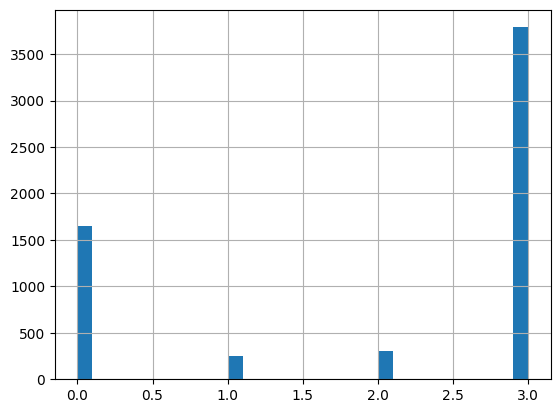

In [ ]:
#nos centramos un poco en la regla de negocio de las entradas fast pass

# Ver distribución de antelación de compra solo para errores
fastpass_errores = df_id_visitante[df_id_visitante['fastpass_fuera_rango']]

# Ver estadísticos
print(fastpass_errores['antelacion_de_compra'].describe())

#Histograma para entender como se distribuyen los tiempos de antelacion de las entradas que se denominan como FAST PASS

df_id_visitante[df_id_visitante['tipo_entrada'] == 'Pase Rápido']['antelacion_de_compra'].hist(bins=30)

In [ ]:
# Cuantas filas tenemos duplicadas en el dataset en total
num_dupl = df_id_visitante.duplicated().sum()
print(num_dupl)

0


In [ ]:
#duplicados
duplicados_t_id = df_id_visitante[df_id_visitante.duplicated(subset=['t_id'], keep=False)]
duplicados_t_id

t_id  id_visitante    duracion procedencia  \
20787  Training_52789098.jpg           469  350.718750       Spain   
20788  Training_52789098.jpg           675  297.545455       Spain   
30988   Training_8475486.jpg            74  346.444444       Spain   
30989   Training_8475486.jpg           495  377.153846       Spain   

             tipo_entrada      coste  antelacion_de_compra  \
20787    Entrada Infantil  14.762603                  13.0   
20788         Paquete VIP  21.153139                   0.0   
30988          Pase Anual  14.161830                 230.0   
30989  Entrada Individual  18.737504                   0.0   

                    atraccion  comienzo_atraccion  tiempo_de_espera  \
20787     aventuras acuáticas                 478              16.0   
20788                     NaN                <NA>               NaN   
30988  carrera de autos locos                 529              11.0   
30989                     NaN                <NA>               NaN   

      comienzo_atraccion_fecha_hora  duracion_excesiva  fastpass_fuera_rango  \
20787           2022-09-21 05:00:00              False                 False   
20788                           NaT              False                 False   
30988           2022-09-23 08:00:00              False                 False   
30989                           NaT              False                 False   

       hora_atraccion  personas_hora  atraccion_saturada  
20787             478            2.0               False  
20788               0            NaN               False  
30988             529            4.0               False  
30989               0            NaN               False

In [ ]:
#para mantener los duplicados, creamos un nuevo indicador unico mezclando t_id + id_visitante y verificando su unicidad

df_id_visitante['id_visita_unica'] = df_id_visitante['t_id'].astype(str) + '_' + df_id_visitante['id_visitante'].astype(str)

print(df_id_visitante['id_visita_unica'].duplicated().sum())
df_id_visitante

0


t_id  id_visitante    duracion procedencia  \
0      PrivateTest_10072988.jpg           976  342.368421      Mexico   
1      PrivateTest_10077120.jpg           980  356.105263       Spain   
2      PrivateTest_10086748.jpg          1317  337.944444       Spain   
3      PrivateTest_10089743.jpg          1499  332.500000       Spain   
4      PrivateTest_10131363.jpg           665  350.080000       Spain   
...                         ...           ...         ...         ...   
35882     Training_99984859.jpg            31  361.566667       Spain   
35883     Training_99987906.jpg           383  354.676471       Spain   
35884     Training_99988263.jpg           590  351.863636       Spain   
35885     Training_99996831.jpg          1516  312.500000      Brazil   
35886     Training_99999696.jpg           752  370.275862       Spain   

             tipo_entrada      coste  antelacion_de_compra  \
0              Pase Anual  20.854497                 251.0   
1              Pase Anual  20.237757                 328.0   
2        Entrada Familiar  10.622706                 279.0   
3      Entrada Individual  21.241057                 242.0   
4      Entrada Individual  18.730457                 297.0   
...                   ...        ...                   ...   
35882    Entrada Infantil  18.338205                   0.0   
35883         Pase Rápido  10.262901                   0.0   
35884          Pase Anual  16.950483                 278.0   
35885         Pase Rápido  18.439771                   3.0   
35886  Entrada Individual  12.546942                 211.0   

                        atraccion  comienzo_atraccion  tiempo_de_espera  \
0             aventuras acuáticas                 119              13.0   
1         barco pirata misterioso                 325              20.0   
2              cohetes galácticos                 139              13.0   
3      vuelta al mundo en 80 días                 658              20.0   
4               rápido del trueno                 178              12.0   
...                           ...                 ...               ...   
35882           cascada encantada                 278               3.0   
35883  vuelta al mundo en 80 días                 182              15.0   
35884     mundo de las maravillas                  52               9.0   
35885         laberinto de sueños                  70              14.0   
35886         cine 4d emocionante                 506              17.0   

      comienzo_atraccion_fecha_hora  duracion_excesiva  fastpass_fuera_rango  \
0               2022-09-06 06:00:00              False                 False   
1               2022-09-14 20:00:00              False                 False   
2               2022-09-07 02:00:00              False                 False   
3               2022-09-28 17:00:00              False                 False   
4               2022-09-08 17:00:00              False                 False   
...                             ...                ...                   ...   
35882           2022-09-12 21:00:00              False                 False   
35883           2022-09-08 21:00:00              False                 False   
35884           2022-09-03 11:00:00              False                 False   
35885           2022-09-04 05:00:00              False                 False   
35886           2022-09-22 09:00:00              False                 False   

       hora_atraccion  personas_hora  atraccion_saturada  \
0                 119            2.0               False   
1                 325            2.0               False   
2                 139            2.0               False   
3                 658            5.0               False   
4                 178            3.0               False   
...               ...            ...                 ...   
35882             278            2.0               False   
35883             182            1.0               False   
358

In [ ]:
df_id_visitante['id_visitante'].nunique()

1785

In [ ]:
#eliminamos las columnas booleanas, ya no hacen falta

df_id_visitante = df_id_visitante.drop(['duracion_excesiva', 'fastpass_fuera_rango', 'atraccion_saturada'], axis=1)


df_id_visitante

t_id  id_visitante    duracion procedencia  \
0      PrivateTest_10072988.jpg           976  342.368421      Mexico   
1      PrivateTest_10077120.jpg           980  356.105263       Spain   
2      PrivateTest_10086748.jpg          1317  337.944444       Spain   
3      PrivateTest_10089743.jpg          1499  332.500000       Spain   
4      PrivateTest_10131363.jpg           665  350.080000       Spain   
...                         ...           ...         ...         ...   
35882     Training_99984859.jpg            31  361.566667       Spain   
35883     Training_99987906.jpg           383  354.676471       Spain   
35884     Training_99988263.jpg           590  351.863636       Spain   
35885     Training_99996831.jpg          1516  312.500000      Brazil   
35886     Training_99999696.jpg           752  370.275862       Spain   

             tipo_entrada      coste  antelacion_de_compra  \
0              Pase Anual  20.854497                 251.0   
1              Pase Anual  20.237757                 328.0   
2        Entrada Familiar  10.622706                 279.0   
3      Entrada Individual  21.241057                 242.0   
4      Entrada Individual  18.730457                 297.0   
...                   ...        ...                   ...   
35882    Entrada Infantil  18.338205                   0.0   
35883         Pase Rápido  10.262901                   0.0   
35884          Pase Anual  16.950483                 278.0   
35885         Pase Rápido  18.439771                   3.0   
35886  Entrada Individual  12.546942                 211.0   

                        atraccion  comienzo_atraccion  tiempo_de_espera  \
0             aventuras acuáticas                 119              13.0   
1         barco pirata misterioso                 325              20.0   
2              cohetes galácticos                 139              13.0   
3      vuelta al mundo en 80 días                 658              20.0   
4               rápido del trueno                 178              12.0   
...                           ...                 ...               ...   
35882           cascada encantada                 278               3.0   
35883  vuelta al mundo en 80 días                 182              15.0   
35884     mundo de las maravillas                  52               9.0   
35885         laberinto de sueños                  70              14.0   
35886         cine 4d emocionante                 506              17.0   

      comienzo_atraccion_fecha_hora  hora_atraccion  personas_hora  \
0               2022-09-06 06:00:00             119            2.0   
1               2022-09-14 20:00:00             325            2.0   
2               2022-09-07 02:00:00             139            2.0   
3               2022-09-28 17:00:00             658            5.0   
4               2022-09-08 17:00:00             178            3.0   
...                             ...             ...            ...   
35882           2022-09-12 21:00:00             278            2.0   
35883           2022-09-08 21:00:00             182            1.0   
35884           2022-09-03 11:00:00              52            1.0   
35885           2022-09-04 05:00:00              70            3.0   
35886           2022-09-22 09:00:00             506            1.0   

                     id_visita_unica  
0       PrivateTest_10072988.jpg_976  
1       PrivateTest_10077120.jpg_980  
2      PrivateTest_10086748.jpg_1317  
3      PrivateTest_10089743.jpg_1499  
4       PrivateTest_10131363.jpg_665  
...                              ...  
35882       Training_99984859.jpg_31  
35883      Training_99987906.jpg_383  
35884      Training_99988263.jpg_590  
35885     Training_99996831.jpg_1516  
35886      Training_99999696.jpg_752  

[35887 rows x 14 columns]

In [ ]:
df_id_visitante.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   t_id                           35887 non-null  object        
 1   id_visitante                   35887 non-null  int64         
 2   duracion                       34607 non-null  float64       
 3   procedencia                    35887 non-null  object        
 4   tipo_entrada                   35874 non-null  object        
 5   coste                          35874 non-null  float64       
 6   antelacion_de_compra           35874 non-null  float64       
 7   atraccion                      34525 non-null  object        
 8   comienzo_atraccion             35657 non-null  Int64         
 9   tiempo_de_espera               35657 non-null  float64       
 10  comienzo_atraccion_fecha_hora  35657 non-null  datetime64[ns]
 11  hora_atraccion 

## 🟣Vamos a ver visitantes unicos/dia

<Axes: title={'center': 'Visitantes únicos por día'}, xlabel='fecha'>

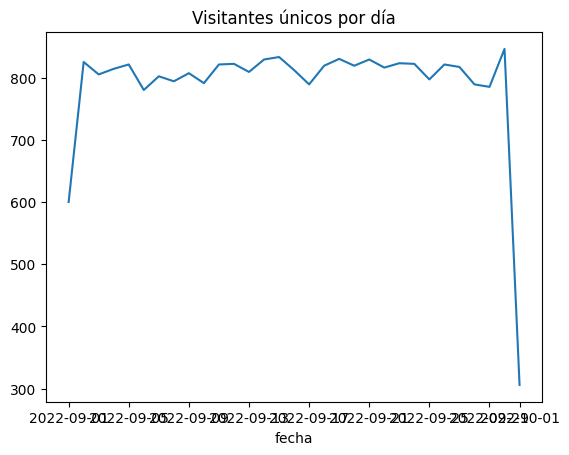

In [ ]:
df_id_visitante['fecha'] = pd.to_datetime(df_id_visitante['comienzo_atraccion_fecha_hora']).dt.date
df_id_visitante.groupby('fecha')['id_visitante'].nunique().plot(title='Visitantes únicos por día')

## 🟣Analizamos el coste de las entradas vs tipo de entrada

In [ ]:
df_id_visitante['coste'].describe()


count    35874.000000
mean        16.989147
std          4.964447
min          0.154042
25%         13.610500
50%         17.005271
75%         20.339482
max         39.326885
Name: coste, dtype: float64

In [ ]:
#Vamos a usar estadistica para entender entre que valores se deberia mover nuestro coste, ya que vemos un minimo sospechoso de 0.15
#convertimos el coste a 2 decimales, ya que no es realista que tenga tantas


q1 = df_id_visitante['coste'].quantile(0.25)
q3 = df_id_visitante['coste'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Ver los que están fuera del rango típico
outliers_coste = df_id_visitante[(df_id_visitante['coste'] < limite_inferior) | (df_id_visitante['coste'] > limite_superior)]
print(limite_inferior)
print(limite_superior)

#calculamos el porcentaje de outliers de coste para ver que hacer con ellos
len(outliers_coste)
porcentaje = len(outliers_coste) / len(df_id_visitante) * 100
print(f"{porcentaje:.2f}% son outliers de coste")

3.517028016861003
30.432954231734044
0.61% son outliers de coste


In [ ]:
#eliminamos outliers de coste
df_id_visitante = df_id_visitante[
    (df_id_visitante['coste'] >= limite_inferior) &
    (df_id_visitante['coste'] <= limite_superior)
].reset_index(drop=True)

#redondeamos
df_id_visitante['coste'] = df_id_visitante['coste'].round(2)
df_id_visitante

t_id  id_visitante    duracion procedencia  \
0      PrivateTest_10072988.jpg           976  342.368421      Mexico   
1      PrivateTest_10077120.jpg           980  356.105263       Spain   
2      PrivateTest_10086748.jpg          1317  337.944444       Spain   
3      PrivateTest_10089743.jpg          1499  332.500000       Spain   
4      PrivateTest_10131363.jpg           665  350.080000       Spain   
...                         ...           ...         ...         ...   
35649     Training_99984859.jpg            31  361.566667       Spain   
35650     Training_99987906.jpg           383  354.676471       Spain   
35651     Training_99988263.jpg           590  351.863636       Spain   
35652     Training_99996831.jpg          1516  312.500000      Brazil   
35653     Training_99999696.jpg           752  370.275862       Spain   

             tipo_entrada  coste  antelacion_de_compra  \
0              Pase Anual  20.85                 251.0   
1              Pase Anual  20.24                 328.0   
2        Entrada Familiar  10.62                 279.0   
3      Entrada Individual  21.24                 242.0   
4      Entrada Individual  18.73                 297.0   
...                   ...    ...                   ...   
35649    Entrada Infantil  18.34                   0.0   
35650         Pase Rápido  10.26                   0.0   
35651          Pase Anual  16.95                 278.0   
35652         Pase Rápido  18.44                   3.0   
35653  Entrada Individual  12.55                 211.0   

                        atraccion  comienzo_atraccion  tiempo_de_espera  \
0             aventuras acuáticas                 119              13.0   
1         barco pirata misterioso                 325              20.0   
2              cohetes galácticos                 139              13.0   
3      vuelta al mundo en 80 días                 658              20.0   
4               rápido del trueno                 178              12.0   
...                           ...                 ...               ...   
35649           cascada encantada                 278               3.0   
35650  vuelta al mundo en 80 días                 182              15.0   
35651     mundo de las maravillas                  52               9.0   
35652         laberinto de sueños                  70              14.0   
35653         cine 4d emocionante                 506              17.0   

      comienzo_atraccion_fecha_hora  hora_atraccion  personas_hora  \
0               2022-09-06 06:00:00             119            2.0   
1               2022-09-14 20:00:00             325            2.0   
2               2022-09-07 02:00:00             139            2.0   
3               2022-09-28 17:00:00             658            5.0   
4               2022-09-08 17:00:00             178            3.0   
...                             ...             ...            ...   
35649           2022-09-12 21:00:00             278            2.0   
35650           2022-09-08 21:00:00             182            1.0   
35651           2022-09-03 11:00:00              52            1.0   
35652           2022-09-04 05:00:00              70            3.0   
35653           2022-09-22 09:00:00             506            1.0   

                     id_visita_unica       fecha  
0       PrivateTest_10072988.jpg_976  2022-09-06  
1       PrivateTest_10077120.jpg_980  2022-09-14  
2      PrivateTest_10086748.jpg_1317  2022-09-07  
3      PrivateTest_10089743.jpg_1499  2022-09-28  
4       PrivateTest_10131363.jpg_665  2022-09-08  
...                              ...         ...  
35649       Training_99984859.jpg_31  2022-09-12  
35650      Training_99987906.jpg_383  2022-09-08  
35651      Training_99988263.jpg_590  2022-09-03  
35652     Training_99996831.jpg_1516  2022-09-04  
35653      Training_99999696.jpg_752  2022-09-22  

[35654 rows x 15 columns]

In [ ]:
#vamos a entender como se asocia el coste al tipo de entrada
df_id_visitante.groupby('tipo_entrada')['coste'].describe()

count       mean       std   min      25%    50%     75%  \
tipo_entrada                                                                    
Entrada Familiar    5942.0  17.052999  4.822661  3.53  13.7525  17.10  20.380   
Entrada Individual  5936.0  17.020221  4.808846  3.61  13.6200  17.04  20.350   
Entrada Infantil    5952.0  17.002364  4.919712  3.73  13.5500  17.06  20.410   
Paquete VIP         5933.0  16.964062  4.855088  3.52  13.5600  16.96  20.290   
Pase Anual          5935.0  16.923523  4.790139  3.55  13.5800  16.96  20.215   
Pase Rápido         5956.0  16.933113  4.857217  3.53  13.7100  16.92  20.260   

                      max  
tipo_entrada               
Entrada Familiar    30.39  
Entrada Individual  30.27  
Entrada Infantil    30.42  
Paquete VIP         30.40  
Pase Anual          30.32  
Pase Rápido         30.33

In [ ]:
#calculamos la recaudacion total del parque
recaudacion_total = df_id_visitante['coste'].sum()
print(f"Recaudación total del parque: {recaudacion_total:.2f} €")

Recaudación total del parque: 605501.53 €


In [ ]:
#recaudacion por tipo de entrada
recaudacion_por_tipo = df_id_visitante.groupby('tipo_entrada')['coste'].sum().sort_values(ascending=False).round(2)
print(recaudacion_por_tipo)

tipo_entrada
Entrada Familiar      101328.92
Entrada Infantil      101198.07
Entrada Individual    101032.03
Pase Rápido           100853.62
Paquete VIP           100647.78
Pase Anual            100441.11
Name: coste, dtype: float64


## 🟣Analizamos tipo de entrada vs antelacion de compra

In [ ]:
df_id_visitante.groupby('tipo_entrada')['antelacion_de_compra'].describe(include='all')

count        mean         std  min  25%   50%     75%  \
tipo_entrada                                                                 
Entrada Familiar    5942.0  119.838943  121.782082  0.0  0.0  88.0  228.00   
Entrada Individual  5936.0  120.263309  121.899272  0.0  0.0  88.0  227.25   
Entrada Infantil    5952.0  118.768481  121.541672  0.0  0.0  82.0  226.00   
Paquete VIP         5933.0  118.546098  120.661541  0.0  0.0  85.0  225.00   
Pase Anual          5935.0  118.805729  120.698383  0.0  0.0  87.0  222.00   
Pase Rápido         5956.0    2.042310    1.331359  0.0  0.0   3.0    3.00   

                      max  
tipo_entrada               
Entrada Familiar    364.0  
Entrada Individual  364.0  
Entrada Infantil    364.0  
Paquete VIP         364.0  
Pase Anual          364.0  
Pase Rápido           3.0

# 📈APLICAMOS TECNICAS DE ANALISIS Y VISUALIZACION DE VARIABLES NUMERICAS Y CATEGORICAS - CLASE DE VISUALIZACION DE PHYTON📈

In [ ]:
# Visualizar variables numéricas: hacer una funcion con histogramas
numericas = ['duracion', 'coste', 'antelacion_de_compra', 'tiempo_de_espera', 'hora_atraccion', 'personas_hora']

for col in numericas:
    fig = px.histogram(df_id_visitante, x=col, title=f'Distribución de {col}')
    fig.show()

In [ ]:
# Tiempo de espera por atracción
fig = px.box(df_id_visitante, x='atraccion', y='tiempo_de_espera', title='Tiempo de Espera por Atracción')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

El tiempo de espera es bastante parecido entre atracciones, con medianas cercanas a los 12-14 minutos. Hay outliers hacia tiempos de espera más altos más de 25 minutos en algunas atracciones

## 🕐Atracciones con menor y mayor tiempo de espera🕐

In [ ]:
# Agrupar por atracción y calcular el tiempo de espera medio
tiempo_espera_medio = df_id_visitante.groupby('atraccion')['tiempo_de_espera'].mean().reset_index()

# Ordenar de menor a mayor tiempo de espera
tiempo_espera_medio = tiempo_espera_medio.sort_values(by='tiempo_de_espera')

# Seleccionar el Top 10
top10_rapidas = tiempo_espera_medio.head(10)

# Mostrar el resultado
print(top10_rapidas)

                  atraccion  tiempo_de_espera
17      jardín de las hadas         12.184959
10        circus fantástico         12.337290
22  mundo de las maravillas         12.339339
3     caravana de aventuras         12.346473
25           safari salvaje         12.367284
19        mansión embrujada         12.394790
30      torbellino espacial         12.396285
20     montaña del misterio         12.399586
9            circuito veloz         12.402263
8       cine 4d emocionante         12.442606


In [ ]:
fig = px.bar(
    top10_rapidas,
    x='atraccion',
    y='tiempo_de_espera',
    title='Top 10 atracciones con menor tiempo de espera',
    labels={'tiempo_de_espera': 'Tiempo de espera medio (min)', 'atraccion': 'Atracción'},
    color='tiempo_de_espera',
    color_continuous_scale='spectral'
)
# Ajustar rango del eje Y porque los tiempos de espera son muy similares y querés hacer más visible la diferencia
fig.update_layout(
    title_x=0.5,
    yaxis_range=[12, 12.5]
)
fig.update_layout(title_x=0.5)
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.show()

In [ ]:
# Agrupar por atracción y calcular el tiempo de espera medio
tiempo_espera_medio = df_id_visitante.groupby('atraccion')['tiempo_de_espera'].mean().reset_index()

# Ordenar de mayor a menor tiempo de espera
tiempo_espera_medio = tiempo_espera_medio.sort_values(by='tiempo_de_espera', ascending=False)

# Seleccionar el Top 5
top10_lentas = tiempo_espera_medio.head(10)

# Mostrar el resultado
print(top10_lentas)


                     atraccion  tiempo_de_espera
6           carrusel encantado         12.804004
5   carros chocones divertidos         12.760322
26             selva encantada         12.670490
21     montaña rusa de la luna         12.630846
24           rápido del trueno         12.616314
29       tobogán del arco iris         12.612640
0              araña saltarina         12.607943
12              cúpula estelar         12.594262
13              dragón volador         12.582992
4       carrera de autos locos         12.581466


In [ ]:
fig = px.bar(
    top10_lentas,
    x='atraccion',
    y='tiempo_de_espera',
    title='Top 10 atracciones con mayor tiempo de espera',
    labels={'tiempo_de_espera': 'Tiempo de espera medio (min)', 'atraccion': 'Atracción'},
    color='tiempo_de_espera',
    color_continuous_scale='tealrose'
)

# Ajustar rango del eje Y porque los tiempos de espera son muy similares y querés hacer más visible la diferencia
fig.update_layout(
    title_x=0.5,
    yaxis_range=[12.5, 13]
)


fig.update_layout(title_x=0.5)
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.show()